# Extracción data

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Para ejecutar en colab
with open("/content/drive/MyDrive/Desafio_Inmobiliaria/data/raw/barrios.csv", "r") as f:
    barrios = f.read()
    print(type(barrios))
    print(barrios)

# Para ejecutar en local
# with open("../data/raw/barrios.csv", "r") as f:
#     barrios = f.read()
#     print(type(barrios))
#     print(barrios)

<class 'str'>
ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
Madrid,Salamanca,Centro,28477.0,6356.0,40.4207,-3.7176,1,3,3,1,Medio,6.3,3.1,8.4
Madrid,Chamberí,Centro,30715.0,5036.0,40.4085,-3.7091,2,1,0,1,Bajo,4.2,6.1,6.6
Madrid,Retiro,Norte,20788.0,3372.0,40.4166,-3.7224,3,1,7,1,Alto,9.3,5.5,4.6
Madrid,Centro,Periférico,30416.0,5648.0,40.408,-3.7021,1,0,3,4,Medio,5.7,5.7,6.5
Madrid,Tetuán,Periférico,27319.0,5002.0,40.3993,-3.7114,3,1,6,0,Alto,8.0,4.9,8.6
Madrid,Arganzuela,Periférico,31325.0,5480.0,40.4132,-3.6936,1,0,6,4,Alto,6.5,6.6,6.4
Barcelona,Eixample,Centro,33916.0,8007.0,41.3654,2.1738,1,0,4,3,Medio,6.1,4.1,7.0
Barcelona,Gràcia,Centro,25422.0,3944.0,41.3762,2.1897,1,2,4,3,Alto,10.0,6.3,8.4
Barcelona,Sants-Montjuïc,Sur,36946.0,5603.0,41.3856,2.1625,1,1,2,0,Bajo,7.8,8.2,5.2
Barcelona,Ciutat Vella,Centro

In [ ]:
# en colab
df_barrios = pd.read_csv("/content/drive/MyDrive/Desafio_Inmobiliaria/data/raw/barrios.csv")
# en local
# df_barrios = pd.read_csv("../data/raw/barrios.csv")

print(f"Filas y columnas {df_barrios.shape}")
df_barrios.sample(3)

Filas y columnas (33, 15)


,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
6,Barcelona,Eixample,Centro,33916.0,8007.0,41.3654,2.1738,1,0,4,3,Medio,6.1,4.1,7.0
1,Madrid,Chamberí,Centro,30715.0,5036.0,40.4085,-3.7091,2,1,0,1,Bajo,4.2,6.1,6.6
24,Bilbao,Casco Viejo,NaN,28315.0,5728.0,43.2682,-2.9272,4,0,5,2,Alto,6.6,4.1,7.5


In [ ]:
# en colab
df_ciudades = pd.read_csv("/content/drive/MyDrive/Desafio_Inmobiliaria/data/raw/ciudades.csv")
# en local
# df_ciudades = pd.read_csv("../data/raw/ciudades.csv")

print(f"Filas y columnas {df_ciudades.shape}")
df_ciudades

Filas y columnas (7, 7)


,ciudad,comunidad_autonoma,poblacion,superficie_km2,precio_m2_medio,latitud_centro,longitud_centro
0,Madrid,Madrid,3300000,604.3,5000,40.4168,-3.7038
1,Barcelona,Cataluña,1600000,101.9,4500,41.3851,2.1734
2,Valencia,Comunidad Valenciana,800000,134.6,3000,39.4699,-0.3763
3,Sevilla,Andalucía,700000,140.0,3200,37.3891,-5.9845
4,Bilbao,País Vasco,345000,41.6,4000,43.2630,-2.9350
5,Málaga,Andalucía,578000,398.0,3500,36.7213,-4.4214
6,Zaragoza,Aragón,675000,973.0,2800,41.6488,-0.8891


In [ ]:
# en colab
df_tipos = pd.read_csv("/content/drive/MyDrive/Desafio_Inmobiliaria/data/raw/tipos_inmueble.csv")
# en local
# df_tipos = pd.read_csv("../data/raw/tipos_inmueble.csv")

print(f"Filas y columnas {df_tipos.shape}")
df_tipos

Filas y columnas (5, 2)


,tipo_inmueble,descripcion
0,Piso,"Apartamento en edificio, usualmente con varias..."
1,Estudio,"Vivienda de planta única, generalmente compacta."
2,Dúplex,Apartamento de dos niveles comunicados mediant...
3,Ático,"Piso en la última planta, con vistas y terraza."
4,Chalet,"Casa independiente, a menudo con jardín y mayo..."


In [ ]:
# en colab
df_propiedades = pd.read_csv("/content/drive/MyDrive/Desafio_Inmobiliaria/data/raw/dataset_inmobiliario_imperfecto.csv")
# en local
# df_propiedades = pd.read_csv("../data/raw/dataset_inmobiliario_imperfecto.csv")

print(f"Filas y columnas {df_propiedades.shape}")
df_propiedades

Filas y columnas (7000, 19)


,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
0,1,Madrid,Arganzuela,Venta,Estudio,NaN,57.800000,3.0,1.0,Buen estado,2000,2,True,True,False,False,True,4.10,2024-11-04
1,2,Madrid,Arganzuela,Alquiler,Piso,NaN,NaN,3.0,1.0,Buen estado,1996,Bajo,True,True,False,False,True,5.26,2024-10-16
2,3,Madrid,Salamanca,Venta,Piso,821455.0,153.978185,2.0,1.0,Buen estado,1996,3,False,True,False,False,False,5.13,2025-03-24
3,4,Madrid,Arganzuela,Venta,Piso,337577.0,74.000000,4.0,2.0,Buen estado,1945,Bajo,True,True,False,False,False,5.52,2024-11-18
4,5,Madrid,Arganzuela,Venta,Piso,394652.0,82.000000,3.0,1.0,Buen estado,1981,5,True,False,NaN,False,True,5.97,2024-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,Zaragoza,La Romareda,Venta,Ático,150411.0,70.500000,5.0,1.0,Buen estado,1976,2,False,False,False,False,False,4.08,2025-01-15
6996,6997,Zaragoza,Centro,Venta,Piso,147376.0,64.800000,7.0,1.0,A reformar,1999,4,True,False,NaN,False,False,5.01,2024-11-11
6997,6998,Zaragoza,San José,Venta,Ático,461868.0,148.102288,3.0,NaN,Buen estado,1956,6,False,True,False,True,False,5.59,2024-11-02
6998,6999,Zaragoza,Delicias,Venta,Piso,207797.0,66.300000,1.0,1.0,Buen estado,1987,1,True,True,False,False,True,4.03,2024-10-10


# EDA

## Barrios.csv

In [10]:
print("Shape:", df_barrios.shape, sep="\n")

print("\nColumnas:", df_barrios.columns.tolist(), sep="\n", end="\n\n")

print("Muestra del dataset:")
display(df_barrios.sample(3))

Shape:
(33, 15)

Columnas:
['ciudad', 'barrio', 'distrito', 'renta_media', 'precio_m2_barrio', 'latitud_barrio', 'longitud_barrio', 'num_colegios', 'num_centros_salud', 'num_estaciones_transp', 'num_zonas_verdes', 'nivel_servicios', 'indice_seguridad', 'indice_contaminacion', 'indice_accesibilidad']

Muestra del dataset:


,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
17,Sevilla,Nervión,NaN,18511.0,3687.0,37.3880,-5.9976,2,1,5,0,Medio,6.4,6.7,7.1
29,Zaragoza,Centro,NaN,30232.0,5968.0,41.6555,-0.9022,1,0,1,0,Bajo,6.1,6.8,5.4
16,Sevilla,Triana,NaN,39855.0,7651.0,37.3790,-5.9903,1,0,0,0,Bajo,8.0,7.7,8.2


In [11]:
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ciudad                 33 non-null     object 
 1   barrio                 33 non-null     object 
 2   distrito               11 non-null     object 
 3   renta_media            33 non-null     float64
 4   precio_m2_barrio       33 non-null     float64
 5   latitud_barrio         33 non-null     float64
 6   longitud_barrio        33 non-null     float64
 7   num_colegios           33 non-null     int64  
 8   num_centros_salud      33 non-null     int64  
 9   num_estaciones_transp  33 non-null     int64  
 10  num_zonas_verdes       33 non-null     int64  
 11  nivel_servicios        33 non-null     object 
 12  indice_seguridad       33 non-null     float64
 13  indice_contaminacion   33 non-null     float64
 14  indice_accesibilidad   33 non-null     float64
dtypes: float

### Conversión de tipo 

In [12]:
df_barrios.dtypes

ciudad                    object
barrio                    object
distrito                  object
renta_media              float64
precio_m2_barrio         float64
latitud_barrio           float64
longitud_barrio          float64
num_colegios               int64
num_centros_salud          int64
num_estaciones_transp      int64
num_zonas_verdes           int64
nivel_servicios           object
indice_seguridad         float64
indice_contaminacion     float64
indice_accesibilidad     float64
dtype: object

In [13]:
# Cambio de tipo de las columnas object a tipo string para mejor manejo de nulos

# Búsqueda de las columnas de tipo object
columnas_object = df_barrios.select_dtypes(include='object').columns

# Se cambia a tipo string
df_barrios[columnas_object] = df_barrios[columnas_object].astype('string')

print(df_barrios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ciudad                 33 non-null     string 
 1   barrio                 33 non-null     string 
 2   distrito               11 non-null     string 
 3   renta_media            33 non-null     float64
 4   precio_m2_barrio       33 non-null     float64
 5   latitud_barrio         33 non-null     float64
 6   longitud_barrio        33 non-null     float64
 7   num_colegios           33 non-null     int64  
 8   num_centros_salud      33 non-null     int64  
 9   num_estaciones_transp  33 non-null     int64  
 10  num_zonas_verdes       33 non-null     int64  
 11  nivel_servicios        33 non-null     string 
 12  indice_seguridad       33 non-null     float64
 13  indice_contaminacion   33 non-null     float64
 14  indice_accesibilidad   33 non-null     float64
dtypes: float

### Duplicados

In [14]:
# Duplicados

duplicados_barrios = df_barrios[df_barrios.duplicated()]
print(f"Duplicados en el dataset barrios: {len(duplicados_barrios)}")

Duplicados en el dataset barrios: 0


### Nulos

In [15]:
# Nulos

nulos_barrios = df_barrios.isnull().sum()
print(f"Nulos en el dataset barrios: \n\n{nulos_barrios}")

Nulos en el dataset barrios: 

ciudad                    0
barrio                    0
distrito                 22
renta_media               0
precio_m2_barrio          0
latitud_barrio            0
longitud_barrio           0
num_colegios              0
num_centros_salud         0
num_estaciones_transp     0
num_zonas_verdes          0
nivel_servicios           0
indice_seguridad          0
indice_contaminacion      0
indice_accesibilidad      0
dtype: int64


In [16]:
# Se exploran los nulos en distrito

df_barrios[df_barrios['distrito'].isnull()]

,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
11,Valencia,Ruzafa,<NA>,26937.0,6182.0,39.4700,-0.3732,1,1,0,1,Bajo,7.7,6.7,8.1
12,Valencia,El Carmen,<NA>,28313.0,6975.0,39.4840,-0.3845,2,0,4,2,Medio,6.4,8.6,7.1
13,Valencia,Ensanche,<NA>,31107.0,6851.0,39.4643,-0.3846,5,2,4,1,Alto,8.1,10.0,4.2
14,Valencia,Benimaclet,<NA>,29804.0,4562.0,39.4514,-0.3634,1,2,2,3,Medio,4.1,7.0,7.7
15,Valencia,Campanar,<NA>,32336.0,5726.0,39.4675,-0.3932,0,3,1,2,Medio,5.6,5.1,8.4
16,Sevilla,Triana,<NA>,39855.0,7651.0,37.3790,-5.9903,1,0,0,0,Bajo,8.0,7.7,8.2
17,Sevilla,Nervión,<NA>,18511.0,3687.0,37.3880,-5.9976,2,1,5,0,Medio,6.4,6.7,7.1
18,Sevilla,Los Remedios,<NA>,29530.0,6129.0,37.3846,-5.9788,3,2,1,0,Medio,6.7,7.4,6.1
19,Sevilla,Macarena,<NA>,23543.0,5521.0,37.3700,-5.9719,1,3,2,4,Alto,5.8,6.0,8.7
20,Sevilla,Santa Cruz,<NA>,35870.0,8087.0,37.3732,-5.9684,2,1,0,1,Bajo,5.8,7.5,6.8


Es posible que no se hayan registrado algunos distritos debido a fallo en la recolección de datos o a que simplemente no existan distritos.

In [17]:
df_barrios[['ciudad', 'distrito']].value_counts().sort_index()

ciudad     distrito  
Barcelona  Centro        4
           Sur           1
Madrid     Centro        2
           Norte         1
           Periférico    3
Name: count, dtype: int64

In [18]:
df_barrios.groupby(['ciudad', 'distrito'], dropna=False).agg({'barrio':'count'})

barrio
ciudad    distrito          
Barcelona Centro           4
          Sur              1
Bilbao    <NA>             4
Madrid    Centro           2
          Norte            1
          Periférico       3
Málaga    <NA>             4
Sevilla   <NA>             5
Valencia  <NA>             5
Zaragoza  <NA>             4

In [19]:
df_barrios[df_barrios['ciudad'].isin(['Zaragoza','Sevilla'])]

,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
16,Sevilla,Triana,<NA>,39855.0,7651.0,37.3790,-5.9903,1,0,0,0,Bajo,8.0,7.7,8.2
17,Sevilla,Nervión,<NA>,18511.0,3687.0,37.3880,-5.9976,2,1,5,0,Medio,6.4,6.7,7.1
18,Sevilla,Los Remedios,<NA>,29530.0,6129.0,37.3846,-5.9788,3,2,1,0,Medio,6.7,7.4,6.1
19,Sevilla,Macarena,<NA>,23543.0,5521.0,37.3700,-5.9719,1,3,2,4,Alto,5.8,6.0,8.7
20,Sevilla,Santa Cruz,<NA>,35870.0,8087.0,37.3732,-5.9684,2,1,0,1,Bajo,5.8,7.5,6.8
29,Zaragoza,Centro,<NA>,30232.0,5968.0,41.6555,-0.9022,1,0,1,0,Bajo,6.1,6.8,5.4
30,Zaragoza,La Romareda,<NA>,21124.0,4232.0,41.6564,-0.9075,2,2,3,1,Medio,4.7,10.0,6.5
31,Zaragoza,Delicias,<NA>,20614.0,4633.0,41.6303,-0.8990,4,1,2,0,Medio,3.2,5.4,6.0
32,Zaragoza,San José,<NA>,19587.0,4682.0,41.6525,-0.8819,2,1,2,1,Medio,6.0,8.4,9.9


Se comprueba que hay ciudades que no tienen distritos, por eso hay nulos en este campo. Sólo las ciudades grandes como Madrid o Barcelona son los suficientemente grandes como para dividirse en distritos.

### Análisis de columnas

#### Ciudad

In [20]:
df_barrios['ciudad'].dtype

string[python]

In [21]:
df_barrios['ciudad'].value_counts().sort_index()

ciudad
Barcelona    5
Bilbao       4
Madrid       6
Málaga       4
Sevilla      5
Valencia     5
Zaragoza     4
Name: count, dtype: Int64

In [22]:
# Comprobación de espacios iniciales y finales innecesarios

print("Longitud caracteres:",df_barrios['ciudad'].apply(len), sep="\n")

df_barrios['ciudad'] = df_barrios['ciudad'].str.strip().str.lower()
print(df_barrios['ciudad'])

print("Longitud caracteres:",df_barrios['ciudad'].apply(len), sep="\n")

Longitud caracteres:
0     6
1     6
2     6
3     6
4     6
5     6
6     9
7     9
8     9
9     9
10    9
11    8
12    8
13    8
14    8
15    8
16    7
17    7
18    7
19    7
20    7
21    6
22    6
23    6
24    6
25    6
26    6
27    6
28    6
29    8
30    8
31    8
32    8
Name: ciudad, dtype: int64
0        madrid
1        madrid
2        madrid
3        madrid
4        madrid
5        madrid
6     barcelona
7     barcelona
8     barcelona
9     barcelona
10    barcelona
11     valencia
12     valencia
13     valencia
14     valencia
15     valencia
16      sevilla
17      sevilla
18      sevilla
19      sevilla
20      sevilla
21       bilbao
22       bilbao
23       bilbao
24       bilbao
25       málaga
26       málaga
27       málaga
28       málaga
29     zaragoza
30     zaragoza
31     zaragoza
32     zaragoza
Name: ciudad, dtype: string
Longitud caracteres:
0     6
1     6
2     6
3     6
4     6
5     6
6     9
7     9
8     9
9     9
10    9
11    8
12    8
13    8

#### Barrio

In [23]:
print("Cantidad de barrios únicos:",df_barrios['barrio'].nunique(), sep='\n', end='\n\n')

print("Listado de barrios únicos:", df_barrios['barrio'].sort_values().unique().tolist(), sep='\n')

Cantidad de barrios únicos:
31

Listado de barrios únicos:
['Abando', 'Arganzuela', 'Benimaclet', 'Campanar', 'Casco Viejo', 'Centro', 'Chamberí', 'Ciutat Vella', 'Delicias', 'Deusto', 'Eixample', 'El Carmen', 'El Palo', 'Ensanche', 'Gràcia', 'Indautxu', 'La Malagueta', 'La Romareda', 'Los Remedios', 'Macarena', 'Nervión', 'Pedregalejo', 'Retiro', 'Ruzafa', 'Salamanca', 'San José', 'Santa Cruz', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Tetuán', 'Triana']


In [24]:
# Limpieza de caracteres

df_barrios['barrio'] = df_barrios['barrio'].str.strip().str.lower()
df_barrios['barrio'].unique()

<StringArray>
[          'salamanca',            'chamberí',              'retiro',
              'centro',              'tetuán',          'arganzuela',
            'eixample',              'gràcia',      'sants-montjuïc',
        'ciutat vella', 'sarrià-sant gervasi',              'ruzafa',
           'el carmen',            'ensanche',          'benimaclet',
            'campanar',              'triana',             'nervión',
        'los remedios',            'macarena',          'santa cruz',
              'abando',            'indautxu',              'deusto',
         'casco viejo',        'la malagueta',         'pedregalejo',
             'el palo',         'la romareda',            'delicias',
            'san josé']
Length: 31, dtype: string

In [25]:
# Se observan los registros que tienen el mismo barrio contando la primera ocurrencia

print("Cantidad de barrios duplicados:", df_barrios['barrio'].duplicated(keep=False).sum())
df_barrios[df_barrios['barrio'].duplicated(keep=False)]

Cantidad de barrios duplicados: 3


,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
3,madrid,centro,Periférico,30416.0,5648.0,40.4080,-3.7021,1,0,3,4,Medio,5.7,5.7,6.5
25,málaga,centro,<NA>,28999.0,4821.0,36.7377,-4.4085,6,0,3,5,Alto,8.0,4.6,6.1
29,zaragoza,centro,<NA>,30232.0,5968.0,41.6555,-0.9022,1,0,1,0,Bajo,6.1,6.8,5.4


Es normal que haya duplicados en barrio pues Málaga, Madrid y Zaragoza tienen un barrio con el mismo nombre.

#### Distrito

In [26]:
df_barrios['distrito'].unique().tolist()

['Centro', 'Norte', 'Periférico', 'Sur', <NA>]

In [27]:
# Limpieza de caracteres

df_barrios['distrito'] = df_barrios['distrito'].str.lower()
df_barrios['distrito'].unique().tolist()

['centro', 'norte', 'periférico', 'sur', <NA>]

In [28]:
# Ya se sabe que hay ciudades que no tienen distritos

df_barrios['distrito'].isnull().sum()

22

In [29]:
df_barrios[df_barrios['distrito'].notna()]

,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
0,madrid,salamanca,centro,28477.0,6356.0,40.4207,-3.7176,1,3,3,1,Medio,6.3,3.1,8.4
1,madrid,chamberí,centro,30715.0,5036.0,40.4085,-3.7091,2,1,0,1,Bajo,4.2,6.1,6.6
2,madrid,retiro,norte,20788.0,3372.0,40.4166,-3.7224,3,1,7,1,Alto,9.3,5.5,4.6
3,madrid,centro,periférico,30416.0,5648.0,40.4080,-3.7021,1,0,3,4,Medio,5.7,5.7,6.5
4,madrid,tetuán,periférico,27319.0,5002.0,40.3993,-3.7114,3,1,6,0,Alto,8.0,4.9,8.6
5,madrid,arganzuela,periférico,31325.0,5480.0,40.4132,-3.6936,1,0,6,4,Alto,6.5,6.6,6.4
6,barcelona,eixample,centro,33916.0,8007.0,41.3654,2.1738,1,0,4,3,Medio,6.1,4.1,7.0
7,barcelona,gràcia,centro,25422.0,3944.0,41.3762,2.1897,1,2,4,3,Alto,10.0,6.3,8.4
8,barcelona,sants-montjuïc,sur,36946.0,5603.0,41.3856,2.1625,1,1,2,0,Bajo,7.8,8.2,5.2
9,barcelona,ciutat vella,centro,26592.0,5397.0,41.3748,2.1571,4,4,1,2,Alto,8.5,7.4,5.9


In [30]:
barrios_sin_na = df_barrios[df_barrios['distrito'].notna()]

print(barrios_sin_na.duplicated().sum())

display(barrios_sin_na)
display(barrios_sin_na[barrios_sin_na.duplicated()])

0


,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad
0,madrid,salamanca,centro,28477.0,6356.0,40.4207,-3.7176,1,3,3,1,Medio,6.3,3.1,8.4
1,madrid,chamberí,centro,30715.0,5036.0,40.4085,-3.7091,2,1,0,1,Bajo,4.2,6.1,6.6
2,madrid,retiro,norte,20788.0,3372.0,40.4166,-3.7224,3,1,7,1,Alto,9.3,5.5,4.6
3,madrid,centro,periférico,30416.0,5648.0,40.4080,-3.7021,1,0,3,4,Medio,5.7,5.7,6.5
4,madrid,tetuán,periférico,27319.0,5002.0,40.3993,-3.7114,3,1,6,0,Alto,8.0,4.9,8.6
5,madrid,arganzuela,periférico,31325.0,5480.0,40.4132,-3.6936,1,0,6,4,Alto,6.5,6.6,6.4
6,barcelona,eixample,centro,33916.0,8007.0,41.3654,2.1738,1,0,4,3,Medio,6.1,4.1,7.0
7,barcelona,gràcia,centro,25422.0,3944.0,41.3762,2.1897,1,2,4,3,Alto,10.0,6.3,8.4
8,barcelona,sants-montjuïc,sur,36946.0,5603.0,41.3856,2.1625,1,1,2,0,Bajo,7.8,8.2,5.2
9,barcelona,ciutat vella,centro,26592.0,5397.0,41.3748,2.1571,4,4,1,2,Alto,8.5,7.4,5.9


,ciudad,barrio,distrito,renta_media,precio_m2_barrio,latitud_barrio,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad


#### Renta media

In [31]:
# Tipo

print("Tipo:",df_barrios['renta_media'].dtypes)

# Nulos

print("Nulos:",df_barrios['renta_media'].isnull().sum())

# Duplicados

print("Duplicados:",df_barrios['renta_media'].duplicated().sum())

Tipo: float64
Nulos: 0
Duplicados: 0


In [32]:
df_barrios['renta_media'].describe()

count       33.000000
mean     27578.212121
std       5770.260662
min      16717.000000
25%      23543.000000
50%      28313.000000
75%      30715.000000
max      39855.000000
Name: renta_media, dtype: float64

#### Precio m2 barrio

In [33]:
df_barrios["precio_m2_barrio"].describe()

count      33.000000
mean     5548.121212
std      1292.533383
min      3274.000000
25%      4682.000000
50%      5521.000000
75%      6129.000000
max      8190.000000
Name: precio_m2_barrio, dtype: float64

In [34]:
print("Nulos:",df_barrios["precio_m2_barrio"].isnull().sum())
print("Duplicados:",df_barrios["precio_m2_barrio"].duplicated().sum())

Nulos: 0
Duplicados: 0


#### Latitud barrio

In [35]:
df_barrios["latitud_barrio"].describe()

count    33.000000
mean     40.004015
std       2.110065
min      36.715200
25%      37.388000
50%      40.408500
75%      41.385600
max      43.271200
Name: latitud_barrio, dtype: float64

In [36]:
print("Nulos:",df_barrios["latitud_barrio"].isnull().sum())
print("Duplicados:",df_barrios["latitud_barrio"].duplicated().sum())

Nulos: 0
Duplicados: 0


#### Longitud barrio

In [37]:
df_barrios["longitud_barrio"].describe()

count    33.000000
mean     -2.308927
std       2.654743
min      -5.997600
25%      -4.407400
50%      -2.943300
75%      -0.384600
max       2.189700
Name: longitud_barrio, dtype: float64

In [38]:
print("Nulos:",df_barrios["longitud_barrio"].isnull().sum())
print("Duplicados:",df_barrios["longitud_barrio"].duplicated().sum())

Nulos: 0
Duplicados: 0


#### Numero de colegios

In [39]:
df_barrios["num_colegios"].describe()

count    33.000000
mean      2.151515
std       1.523179
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: num_colegios, dtype: float64

In [40]:
print("Nulos:",df_barrios["num_colegios"].isnull().sum())
print("Duplicados:",df_barrios["num_colegios"].duplicated().sum())

Nulos: 0
Duplicados: 26


#### Numero de centros de salud

In [41]:
df_barrios["num_centros_salud"].describe()

count    33.000000
mean      1.242424
std       1.118881
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: num_centros_salud, dtype: float64

In [42]:
print("Nulos:",df_barrios["num_centros_salud"].isnull().sum())
print("Duplicados:",df_barrios["num_centros_salud"].duplicated().sum())

Nulos: 0
Duplicados: 28


#### Número de estaciones de trasnporte

In [43]:
df_barrios["num_estaciones_transp"].describe()

count    33.000000
mean      2.818182
std       1.943813
min       0.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: num_estaciones_transp, dtype: float64

In [44]:
print("Nulos:",df_barrios["num_estaciones_transp"].isnull().sum())
print("Duplicados:",df_barrios["num_estaciones_transp"].duplicated().sum())

Nulos: 0
Duplicados: 25


#### Número de zonas verdes

In [45]:
df_barrios["num_zonas_verdes"].describe()

count    33.000000
mean      1.575758
std       1.479660
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max       5.000000
Name: num_zonas_verdes, dtype: float64

In [46]:
print("Nulos:",df_barrios["num_zonas_verdes"].isnull().sum())
print("Duplicados:",df_barrios["num_zonas_verdes"].duplicated().sum())

Nulos: 0
Duplicados: 27


#### Nivel servicios

In [47]:
df_barrios['nivel_servicios'].sample(5)

3     Medio
6     Medio
9      Alto
16     Bajo
7      Alto
Name: nivel_servicios, dtype: string

In [48]:
df_barrios['nivel_servicios'].unique()

<StringArray>
['Medio', 'Bajo', 'Alto']
Length: 3, dtype: string

In [49]:
# Limpieza de caracteres

df_barrios['nivel_servicios'] = df_barrios['nivel_servicios'].str.lower()
df_barrios['nivel_servicios'].unique()

<StringArray>
['medio', 'bajo', 'alto']
Length: 3, dtype: string

In [50]:
print("Nulos:",df_barrios["nivel_servicios"].isnull().sum())
print("Duplicados:",df_barrios["nivel_servicios"].duplicated().sum())

Nulos: 0
Duplicados: 30


#### Indice seguridad

In [51]:
df_barrios['indice_seguridad'].describe()

count    33.000000
mean      6.612121
std       1.588190
min       3.200000
25%       5.800000
50%       6.500000
75%       7.800000
max      10.000000
Name: indice_seguridad, dtype: float64

In [52]:
df_barrios['indice_seguridad'].unique()

array([ 6.3,  4.2,  9.3,  5.7,  8. ,  6.5,  6.1, 10. ,  7.8,  8.5,  7.2,
        7.7,  6.4,  8.1,  4.1,  5.6,  6.7,  5.8,  7.4,  6.8,  6.6,  8.8,
        3.4,  4.7,  3.2,  6. ])

In [53]:
print("Nulos:",df_barrios["indice_seguridad"].isnull().sum())
print("Duplicados:",df_barrios["indice_seguridad"].duplicated().sum())

Nulos: 0
Duplicados: 7


#### Indice contaminacion

In [54]:
df_barrios['indice_contaminacion'].sample(5)

29    6.8
17    6.7
25    4.6
1     6.1
0     3.1
Name: indice_contaminacion, dtype: float64

In [55]:
df_barrios['indice_contaminacion'].unique()

array([ 3.1,  6.1,  5.5,  5.7,  4.9,  6.6,  4.1,  6.3,  8.2,  7.4,  6.9,
        6.7,  8.6, 10. ,  7. ,  5.1,  7.7,  6. ,  7.5,  7.9,  6.5,  7.1,
        4.6,  5.3,  6.8,  5.4,  8.4])

In [56]:
print("Nulos:",df_barrios["indice_contaminacion"].isnull().sum())
print("Duplicados:",df_barrios["indice_contaminacion"].duplicated().sum())

Nulos: 0
Duplicados: 6


#### Indice accesibilidad

In [57]:
df_barrios['indice_accesibilidad'].sample(5)

26    10.0
10     7.5
23     8.5
20     6.8
29     5.4
Name: indice_accesibilidad, dtype: float64

In [58]:
df_barrios['indice_accesibilidad'].describe()

count    33.000000
mean      7.136364
std       1.474538
min       4.200000
25%       6.100000
50%       7.100000
75%       8.400000
max      10.000000
Name: indice_accesibilidad, dtype: float64

In [59]:
df_barrios['indice_accesibilidad'].unique()

array([ 8.4,  6.6,  4.6,  6.5,  8.6,  6.4,  7. ,  5.2,  5.9,  7.5,  8.1,
        7.1,  4.2,  7.7,  8.2,  6.1,  8.7,  6.8,  9. ,  8.5, 10. ,  4.4,
        5.4,  6. ,  9.9])

In [60]:
print("Nulos:",df_barrios["indice_accesibilidad"].isnull().sum())
print("Duplicados:",df_barrios["indice_accesibilidad"].duplicated().sum())

Nulos: 0
Duplicados: 8


## Ciudades.csv

In [61]:
print("Shape:", df_ciudades.shape, sep="\n")

print("\nColumnas:", df_ciudades.columns.tolist(), sep="\n", end="\n\n")

print("Dataset:")
display(df_ciudades)

Shape:
(7, 7)

Columnas:
['ciudad', 'comunidad_autonoma', 'poblacion', 'superficie_km2', 'precio_m2_medio', 'latitud_centro', 'longitud_centro']

Dataset:


,ciudad,comunidad_autonoma,poblacion,superficie_km2,precio_m2_medio,latitud_centro,longitud_centro
0,Madrid,Madrid,3300000,604.3,5000,40.4168,-3.7038
1,Barcelona,Cataluña,1600000,101.9,4500,41.3851,2.1734
2,Valencia,Comunidad Valenciana,800000,134.6,3000,39.4699,-0.3763
3,Sevilla,Andalucía,700000,140.0,3200,37.3891,-5.9845
4,Bilbao,País Vasco,345000,41.6,4000,43.2630,-2.9350
5,Málaga,Andalucía,578000,398.0,3500,36.7213,-4.4214
6,Zaragoza,Aragón,675000,973.0,2800,41.6488,-0.8891


In [62]:
df_ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciudad              7 non-null      object 
 1   comunidad_autonoma  7 non-null      object 
 2   poblacion           7 non-null      int64  
 3   superficie_km2      7 non-null      float64
 4   precio_m2_medio     7 non-null      int64  
 5   latitud_centro      7 non-null      float64
 6   longitud_centro     7 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 524.0+ bytes


### Conversión de tipo

In [63]:
df_ciudades.dtypes

ciudad                 object
comunidad_autonoma     object
poblacion               int64
superficie_km2        float64
precio_m2_medio         int64
latitud_centro        float64
longitud_centro       float64
dtype: object

In [64]:
# Cambio de tipo de las columnas object a tipo string para mejor manejo de nulos

# Búsqueda de las columnas de tipo object
columnas_object = df_ciudades.select_dtypes(include='object').columns
print("Columnas tipo 'object':",columnas_object, end="\n\n")

# Se cambia a tipo string
df_ciudades[columnas_object] = df_ciudades[columnas_object].astype('string')

print(df_ciudades.info())

Columnas tipo 'object': Index(['ciudad', 'comunidad_autonoma'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciudad              7 non-null      string 
 1   comunidad_autonoma  7 non-null      string 
 2   poblacion           7 non-null      int64  
 3   superficie_km2      7 non-null      float64
 4   precio_m2_medio     7 non-null      int64  
 5   latitud_centro      7 non-null      float64
 6   longitud_centro     7 non-null      float64
dtypes: float64(3), int64(2), string(2)
memory usage: 524.0 bytes
None


### Duplicados

In [65]:
duplicados_ciudades = df_ciudades[df_ciudades.duplicated()]
print(f"Duplicados en el dataset barrios: {len(duplicados_ciudades)}")

Duplicados en el dataset barrios: 0


### Nulos

In [66]:
nulos_ciudades = df_ciudades.isnull().sum()
print(f"Nulos en el dataset barrios: \n\n{nulos_ciudades}")

Nulos en el dataset barrios: 

ciudad                0
comunidad_autonoma    0
poblacion             0
superficie_km2        0
precio_m2_medio       0
latitud_centro        0
longitud_centro       0
dtype: int64


### Análisis de columnas

#### Ciudad

In [67]:
print("Tipo de la columna:", df_ciudades['ciudad'].dtype)

print("\nÚnicos:",df_ciudades['ciudad'].unique())

Tipo de la columna: string

Únicos: <StringArray>
['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Bilbao', 'Málaga', 'Zaragoza']
Length: 7, dtype: string


In [68]:
# Limpieza de caracteres

df_ciudades['ciudad'] = df_ciudades['ciudad'].str.lower()
df_ciudades['ciudad'].unique()

<StringArray>
['madrid', 'barcelona', 'valencia', 'sevilla', 'bilbao', 'málaga', 'zaragoza']
Length: 7, dtype: string

In [69]:
# Se comprueba que no se repiten

df_ciudades['ciudad'].value_counts().sort_index()

ciudad
barcelona    1
bilbao       1
madrid       1
málaga       1
sevilla      1
valencia     1
zaragoza     1
Name: count, dtype: Int64

Al no repetirse se entiende que puede ser una tabla de dimensión en un modelo relacional de datos

#### Comunidad autónoma

In [70]:
df_ciudades['comunidad_autonoma']

0                  Madrid
1                Cataluña
2    Comunidad Valenciana
3               Andalucía
4              País Vasco
5               Andalucía
6                  Aragón
Name: comunidad_autonoma, dtype: string

In [71]:
print("Tipo:", df_ciudades['comunidad_autonoma'].dtype)

print("Nulos:", df_ciudades['comunidad_autonoma'].isnull().sum())

print("Duplicados:", df_ciudades['comunidad_autonoma'].duplicated().sum())

Tipo: string
Nulos: 0
Duplicados: 1


In [72]:
# Se comprueban estos duplicados

df_ciudades[df_ciudades['comunidad_autonoma'].duplicated(keep=False)]

,ciudad,comunidad_autonoma,poblacion,superficie_km2,precio_m2_medio,latitud_centro,longitud_centro
3,sevilla,Andalucía,700000,140.0,3200,37.3891,-5.9845
5,málaga,Andalucía,578000,398.0,3500,36.7213,-4.4214


Misma comunidad autonoma, distinta ciudad

In [73]:
# Comprobación de espacios iniciales y finales innecesarios


# Se calcula la longitud de caracteres creando un df auxiliar
df_longitud_caracteres = pd.DataFrame()

df_longitud_caracteres['nombres'] = df_ciudades['comunidad_autonoma']
df_longitud_caracteres['longitud_caracteres'] = df_ciudades['comunidad_autonoma'].apply(len)

print("Df antes de limpieza:")
display(df_longitud_caracteres)

# Se limpian espacios
df_ciudades['comunidad_autonoma'] = df_ciudades['comunidad_autonoma'].str.strip()

# Se actualizan los datos en el df auxiliar
df_longitud_caracteres['longitud_caracteres'] = df_ciudades['comunidad_autonoma'].apply(len)

print("Df despues de limpieza")
display(df_longitud_caracteres)

Df antes de limpieza:


,nombres,longitud_caracteres
0,Madrid,6
1,Cataluña,8
2,Comunidad Valenciana,20
3,Andalucía,9
4,País Vasco,10
5,Andalucía,9
6,Aragón,6


Df despues de limpieza


,nombres,longitud_caracteres
0,Madrid,6
1,Cataluña,8
2,Comunidad Valenciana,20
3,Andalucía,9
4,País Vasco,10
5,Andalucía,9
6,Aragón,6


#### Población

In [74]:
df_ciudades['poblacion']

0    3300000
1    1600000
2     800000
3     700000
4     345000
5     578000
6     675000
Name: poblacion, dtype: int64

In [75]:
df_ciudades['poblacion'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7 entries, 0 to 6
Series name: poblacion
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 188.0 bytes


In [76]:
print("Duplicados:",df_ciudades['poblacion'].duplicated().sum())

Duplicados: 0


In [77]:
df_ciudades['poblacion'].describe().round(2)

count          7.00
mean     1142571.43
std      1028789.56
min       345000.00
25%       626500.00
50%       700000.00
75%      1200000.00
max      3300000.00
Name: poblacion, dtype: float64

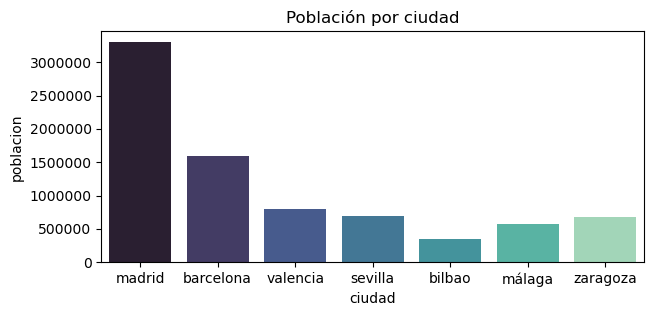

In [78]:
# df_ciudades[['ciudad','poblacion']].plot(kind='bar')

plt.figure(figsize=(7,3))

barras = sns.barplot(x='ciudad', y= 'poblacion', data=df_ciudades, hue='ciudad', palette= 'mako')

plt.ticklabel_format(style='plain', axis='y') # desactiva notación científica del eje y
plt.title("Población por ciudad")

plt.show()

#### Superficie en km2

In [79]:
df_ciudades['superficie_km2']

0    604.3
1    101.9
2    134.6
3    140.0
4     41.6
5    398.0
6    973.0
Name: superficie_km2, dtype: float64

In [80]:
df_ciudades['superficie_km2'].describe()

count      7.000000
mean     341.914286
std      342.005158
min       41.600000
25%      118.250000
50%      140.000000
75%      501.150000
max      973.000000
Name: superficie_km2, dtype: float64

In [81]:
print("Nulos:",df_ciudades['superficie_km2'].isnull().sum())
print("Duplicados:",df_ciudades['superficie_km2'].duplicated().sum())

Nulos: 0
Duplicados: 0


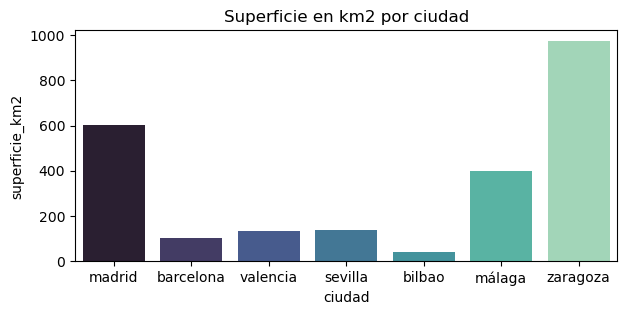

In [82]:
# Superficie en km2 por ciudad

plt.figure(figsize=(7,3))

barras = sns.barplot(x='ciudad', y= 'superficie_km2', data=df_ciudades, hue='ciudad', palette= 'mako')

plt.ticklabel_format(style='plain', axis='y') # desactiva notación científica del eje y
plt.title("Superficie en km2 por ciudad")

plt.show()

In [83]:
# ¿Por qué Zaragoza tiene tanta superficie?

df_ciudades[df_ciudades['ciudad'].isin(['Madrid','Zaragoza'])][['ciudad', 'superficie_km2']]

,ciudad,superficie_km2


La ciudad de Zaragoza es tan extensa debido a que incluye zonas rurales. Tiene más km2 que Madrid o Barcelona.

#### Precio m2 medio

In [84]:
# Se cambia el nombre de la columna para mejor comprensión

df_ciudades.rename(columns={'precio_m2_medio':'precio_m2_ciudad'}, inplace=True)

# Se comprueba el cambio
df_ciudades.columns

Index(['ciudad', 'comunidad_autonoma', 'poblacion', 'superficie_km2',
       'precio_m2_ciudad', 'latitud_centro', 'longitud_centro'],
      dtype='object')

In [85]:
df_ciudades['precio_m2_ciudad']

0    5000
1    4500
2    3000
3    3200
4    4000
5    3500
6    2800
Name: precio_m2_ciudad, dtype: int64

In [86]:
df_ciudades['precio_m2_ciudad'].describe()

count       7.000000
mean     3714.285714
std       817.370931
min      2800.000000
25%      3100.000000
50%      3500.000000
75%      4250.000000
max      5000.000000
Name: precio_m2_ciudad, dtype: float64

In [87]:
print("Nulos:",df_ciudades['precio_m2_ciudad'].isnull().sum())
print("Duplicados:",df_ciudades['precio_m2_ciudad'].duplicated().sum())

Nulos: 0
Duplicados: 0


In [88]:
df_ciudades[['ciudad','precio_m2_ciudad']]

,ciudad,precio_m2_ciudad
0,madrid,5000
1,barcelona,4500
2,valencia,3000
3,sevilla,3200
4,bilbao,4000
5,málaga,3500
6,zaragoza,2800


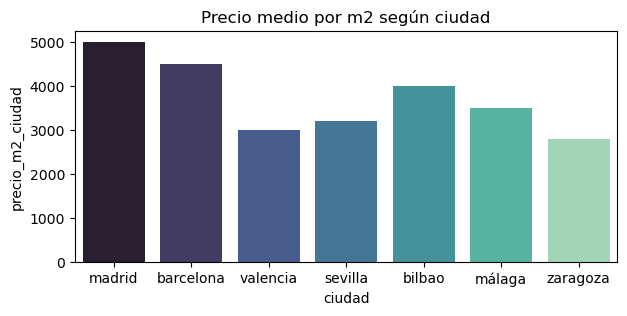

In [89]:
# Precio medio por m2 según ciudad

plt.figure(figsize=(7,3))

barras = sns.barplot(x='ciudad', y= 'precio_m2_ciudad', data=df_ciudades, hue='ciudad', palette= 'mako')

plt.title("Precio medio por m2 según ciudad")

plt.show()

#### Latitud del centro de la ciudad

In [90]:
df_ciudades['latitud_centro']

0    40.4168
1    41.3851
2    39.4699
3    37.3891
4    43.2630
5    36.7213
6    41.6488
Name: latitud_centro, dtype: float64

#### Longitud del centro de la ciudad

In [91]:
df_ciudades['longitud_centro']

0   -3.7038
1    2.1734
2   -0.3763
3   -5.9845
4   -2.9350
5   -4.4214
6   -0.8891
Name: longitud_centro, dtype: float64

## Tipos de inmueble.csv

In [92]:
print("Shape:", df_tipos.shape, sep="\n")

print("\nColumnas:", df_tipos.columns.tolist(), sep="\n", end="\n\n")

print("Dataset:")
display(df_tipos)

Shape:
(5, 2)

Columnas:
['tipo_inmueble', 'descripcion']

Dataset:


,tipo_inmueble,descripcion
0,Piso,"Apartamento en edificio, usualmente con varias..."
1,Estudio,"Vivienda de planta única, generalmente compacta."
2,Dúplex,Apartamento de dos niveles comunicados mediant...
3,Ático,"Piso en la última planta, con vistas y terraza."
4,Chalet,"Casa independiente, a menudo con jardín y mayo..."


In [93]:
df_tipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tipo_inmueble  5 non-null      object
 1   descripcion    5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


### Conversión de tipo

In [94]:
df_tipos.dtypes

tipo_inmueble    object
descripcion      object
dtype: object

In [95]:
# Cambio de tipo de las columnas object a tipo string para mejor manejo de nulos

# Búsqueda de las columnas de tipo object
columnas_object = df_tipos.select_dtypes(include='object').columns
print("Columnas tipo 'object':",columnas_object, end="\n\n")

# Se cambia a tipo string
df_tipos[columnas_object] = df_tipos[columnas_object].astype('string')

print(df_tipos.info())

Columnas tipo 'object': Index(['tipo_inmueble', 'descripcion'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tipo_inmueble  5 non-null      string
 1   descripcion    5 non-null      string
dtypes: string(2)
memory usage: 212.0 bytes
None


### Duplicados

In [96]:
df_tipos.duplicated().sum()

0

### Análisis de columnas

#### Tipo de inmueble

In [97]:
df_tipos['tipo_inmueble']

0       Piso
1    Estudio
2     Dúplex
3      Ático
4     Chalet
Name: tipo_inmueble, dtype: string

In [98]:
df_tipos['tipo_inmueble'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: tipo_inmueble
Non-Null Count  Dtype 
--------------  ----- 
5 non-null      string
dtypes: string(1)
memory usage: 172.0 bytes


In [99]:
# Comprobación de espacios iniciales y finales innecesarios


# Se calcula la longitud de caracteres creando un df auxiliar
df_longitud_caracteres = pd.DataFrame()

df_longitud_caracteres['nombres'] = df_tipos['tipo_inmueble']
df_longitud_caracteres['longitud_caracteres'] = df_tipos['tipo_inmueble'].apply(len)

print("Df antes de limpieza:")
display(df_longitud_caracteres)

# Se limpian espacios
df_tipos['tipo_inmueble'] = df_tipos['tipo_inmueble'].str.strip().str.lower()

# Se actualizan los datos en el df auxiliar
df_longitud_caracteres['longitud_caracteres'] = df_tipos['tipo_inmueble'].apply(len)

print("Df despues de limpieza:")
display(df_longitud_caracteres)

Df antes de limpieza:


,nombres,longitud_caracteres
0,Piso,4
1,Estudio,7
2,Dúplex,6
3,Ático,5
4,Chalet,6


Df despues de limpieza:


,nombres,longitud_caracteres
0,Piso,4
1,Estudio,7
2,Dúplex,6
3,Ático,5
4,Chalet,6


#### Descripción de inmuebles

In [100]:
for descripcion in df_tipos['descripcion']:
    print(descripcion)

Apartamento en edificio, usualmente con varias plantas.
Vivienda de planta única, generalmente compacta.
Apartamento de dos niveles comunicados mediante escalera interna.
Piso en la última planta, con vistas y terraza.
Casa independiente, a menudo con jardín y mayor espacio.


In [101]:
# Longitud en palabras 

df_long_palabras = pd.DataFrame()

df_long_palabras['descripcion'] = df_tipos['descripcion']
df_long_palabras['long_palabras'] = df_tipos['descripcion'].apply(lambda x: len(x.split()))
df_long_palabras['long_caracteres'] = df_tipos['descripcion'].apply(len)

display(df_long_palabras)

,descripcion,long_palabras,long_caracteres
0,"Apartamento en edificio, usualmente con varias...",7,55
1,"Vivienda de planta única, generalmente compacta.",6,48
2,Apartamento de dos niveles comunicados mediant...,8,65
3,"Piso en la última planta, con vistas y terraza.",9,47
4,"Casa independiente, a menudo con jardín y mayo...",9,56


In [102]:
# Limpieza caraceres

df_tipos['descripcion'] = df_tipos['descripcion'].str.strip()

for item in df_tipos['descripcion']:
    print(repr(item))

'Apartamento en edificio, usualmente con varias plantas.'
'Vivienda de planta única, generalmente compacta.'
'Apartamento de dos niveles comunicados mediante escalera interna.'
'Piso en la última planta, con vistas y terraza.'
'Casa independiente, a menudo con jardín y mayor espacio.'


## Dataset imperfecto.csv

In [103]:
print("Shape:", df_propiedades.shape, sep="\n")

print("\nColumnas:", df_propiedades.columns.tolist(), sep="\n", end="\n\n")

print("Dataset:")
display(df_propiedades)

Shape:
(7000, 19)

Columnas:
['id_propiedad', 'ciudad', 'barrio', 'tipo_operacion', 'tipo_inmueble', 'precio', 'superficie_m2', 'habitaciones', 'baños', 'estado', 'año_construccion', 'planta', 'ascensor', 'terraza', 'piscina', 'garaje', 'trastero', 'distancia_centro_km', 'fecha_publicacion']

Dataset:


,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
0,1,Madrid,Arganzuela,Venta,Estudio,NaN,57.800000,3.0,1.0,Buen estado,2000,2,True,True,False,False,True,4.10,2024-11-04
1,2,Madrid,Arganzuela,Alquiler,Piso,NaN,NaN,3.0,1.0,Buen estado,1996,Bajo,True,True,False,False,True,5.26,2024-10-16
2,3,Madrid,Salamanca,Venta,Piso,821455.0,153.978185,2.0,1.0,Buen estado,1996,3,False,True,False,False,False,5.13,2025-03-24
3,4,Madrid,Arganzuela,Venta,Piso,337577.0,74.000000,4.0,2.0,Buen estado,1945,Bajo,True,True,False,False,False,5.52,2024-11-18
4,5,Madrid,Arganzuela,Venta,Piso,394652.0,82.000000,3.0,1.0,Buen estado,1981,5,True,False,NaN,False,True,5.97,2024-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,Zaragoza,La Romareda,Venta,Ático,150411.0,70.500000,5.0,1.0,Buen estado,1976,2,False,False,False,False,False,4.08,2025-01-15
6996,6997,Zaragoza,Centro,Venta,Piso,147376.0,64.800000,7.0,1.0,A reformar,1999,4,True,False,NaN,False,False,5.01,2024-11-11
6997,6998,Zaragoza,San José,Venta,Ático,461868.0,148.102288,3.0,NaN,Buen estado,1956,6,False,True,False,True,False,5.59,2024-11-02
6998,6999,Zaragoza,Delicias,Venta,Piso,207797.0,66.300000,1.0,1.0,Buen estado,1987,1,True,True,False,False,True,4.03,2024-10-10


In [104]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_propiedad         7000 non-null   int64  
 1   ciudad               7000 non-null   object 
 2   barrio               7000 non-null   object 
 3   tipo_operacion       7000 non-null   object 
 4   tipo_inmueble        7000 non-null   object 
 5   precio               6312 non-null   float64
 6   superficie_m2        6653 non-null   float64
 7   habitaciones         6649 non-null   float64
 8   baños                6656 non-null   float64
 9   estado               7000 non-null   object 
 10  año_construccion     7000 non-null   int64  
 11  planta               7000 non-null   object 
 12  ascensor             6633 non-null   object 
 13  terraza              6654 non-null   object 
 14  piscina              6651 non-null   object 
 15  garaje               6656 non-null   o

### Conversión de tipo

In [105]:
# Cambio de tipo de las columnas object a tipo string para mejor manejo de nulos

# Búsqueda de las columnas de tipo object
columnas_object = df_propiedades.select_dtypes(include='object').columns
print("Columnas tipo 'object':",columnas_object, end="\n\n")

# Se cambia a tipo string
df_propiedades[columnas_object] = df_propiedades[columnas_object].astype('string')

print(df_propiedades.info())

Columnas tipo 'object': Index(['ciudad', 'barrio', 'tipo_operacion', 'tipo_inmueble', 'estado',
       'planta', 'ascensor', 'terraza', 'piscina', 'garaje', 'trastero',
       'fecha_publicacion'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_propiedad         7000 non-null   int64  
 1   ciudad               7000 non-null   string 
 2   barrio               7000 non-null   string 
 3   tipo_operacion       7000 non-null   string 
 4   tipo_inmueble        7000 non-null   string 
 5   precio               6312 non-null   float64
 6   superficie_m2        6653 non-null   float64
 7   habitaciones         6649 non-null   float64
 8   baños                6656 non-null   float64
 9   estado               7000 non-null   string 
 10  año_construccion     7000 non-null   int64  
 11  planta           

In [106]:
# Se convierte fecha_publicacion a datetime

print(df_propiedades['fecha_publicacion'].dtype)
display(df_propiedades['fecha_publicacion'].sample())

df_propiedades['fecha_publicacion'] = pd.to_datetime(df_propiedades['fecha_publicacion'])

print(df_propiedades['fecha_publicacion'].dtype)
display(df_propiedades['fecha_publicacion'].sample())

string


973    2024-11-06
Name: fecha_publicacion, dtype: string

datetime64[ns]


5871   2024-10-23
Name: fecha_publicacion, dtype: datetime64[ns]

In [107]:
# Se convierten columnas a Int32


df_propiedades[['id_propiedad','habitaciones','baños','año_construccion']] = df_propiedades[['id_propiedad', 'habitaciones','baños','año_construccion']].astype('Int32') # Se usa Int32 en vez de int32 (minuscula) pues admite nulos. No se usa Int64 pues se quiere ahorrar memoria.

df_propiedades.dtypes

id_propiedad                    Int32
ciudad                 string[python]
barrio                 string[python]
tipo_operacion         string[python]
tipo_inmueble          string[python]
precio                        float64
superficie_m2                 float64
habitaciones                    Int32
baños                           Int32
estado                 string[python]
año_construccion                Int32
planta                 string[python]
ascensor               string[python]
terraza                string[python]
piscina                string[python]
garaje                 string[python]
trastero               string[python]
distancia_centro_km           float64
fecha_publicacion      datetime64[ns]
dtype: object

In [108]:
# Se cambian columnas a tipo int para poder usarlas en la correlación


columnas = ['ascensor','terraza','piscina','garaje','trastero']
# Se muestra para futuras comprobaciones
display(df_propiedades[columnas])

# Se convierten True y False a 1 y 0 pues los nulos no permiten usar astype para cambiar de tipo la columna
# Para ello, primero se define una función
def cambio_a_bool(valor):
    dicc_bool={
        'True':'1',
        'False':'0'
    }
    return dicc_bool.get(valor, valor)

# Se procede a usar la función en todos los registros
for col in columnas:
    df_propiedades[col] = df_propiedades[col].apply(cambio_a_bool)

display(df_propiedades[columnas])

df_propiedades[columnas] = df_propiedades[columnas].astype('Int32')
df_propiedades[columnas].dtypes

,ascensor,terraza,piscina,garaje,trastero
0,True,True,False,False,True
1,True,True,False,False,True
2,False,True,False,False,False
3,True,True,False,False,False
4,True,False,<NA>,False,True
...,...,...,...,...,...
6995,False,False,False,False,False
6996,True,False,<NA>,False,False
6997,False,True,False,True,False
6998,True,True,False,False,True


,ascensor,terraza,piscina,garaje,trastero
0,1,1,0,0,1
1,1,1,0,0,1
2,0,1,0,0,0
3,1,1,0,0,0
4,1,0,<NA>,0,1
...,...,...,...,...,...
6995,0,0,0,0,0
6996,1,0,<NA>,0,0
6997,0,1,0,1,0
6998,1,1,0,0,1


ascensor    Int32
terraza     Int32
piscina     Int32
garaje      Int32
trastero    Int32
dtype: object

In [109]:
df_propiedades.dtypes

id_propiedad                    Int32
ciudad                 string[python]
barrio                 string[python]
tipo_operacion         string[python]
tipo_inmueble          string[python]
precio                        float64
superficie_m2                 float64
habitaciones                    Int32
baños                           Int32
estado                 string[python]
año_construccion                Int32
planta                 string[python]
ascensor                        Int32
terraza                         Int32
piscina                         Int32
garaje                          Int32
trastero                        Int32
distancia_centro_km           float64
fecha_publicacion      datetime64[ns]
dtype: object

### Nulos

In [110]:
df_propiedades.isnull().sum().sort_values(ascending=False)

precio                 688
ascensor               367
distancia_centro_km    359
habitaciones           351
piscina                349
superficie_m2          347
terraza                346
garaje                 344
baños                  344
trastero               343
fecha_publicacion      322
id_propiedad             0
planta                   0
año_construccion         0
ciudad                   0
tipo_inmueble            0
tipo_operacion           0
barrio                   0
estado                   0
dtype: int64

Se explorarán los nulos en el análisis de columna posterior

### Duplicados

In [111]:
df_propiedades.duplicated().sum()

0

### Análisis de columna

#### ID de propiedad

In [112]:
df_propiedades['id_propiedad'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7000 entries, 0 to 6999
Series name: id_propiedad
Non-Null Count  Dtype
--------------  -----
7000 non-null   Int32
dtypes: Int32(1)
memory usage: 34.3 KB


In [113]:
print("Mínimo:",df_propiedades['id_propiedad'].min())
print("Máximo:",df_propiedades['id_propiedad'].max())

Mínimo: 1
Máximo: 7000


Es un ID incremental (sin duplicados, sin nulos) empezando en 1.

#### Ciudad

In [114]:
df_propiedades['ciudad'].unique()

<StringArray>
[     'Madrid',    ' Madrid ',   'Barcelona', ' Barcelona ',    'Valencia',
  ' Valencia ',     'Sevilla',   ' Sevilla ',      'Bilbao',    ' Bilbao ',
      'Málaga',    ' Málaga ',    'Zaragoza',  ' Zaragoza ']
Length: 14, dtype: string

Hay ciudades repetidas ya que veces estan mal escritas así que hay que limpiar los nombres de la ciudades eliminando espacios iniciales y finales innecesarios

In [115]:
# Comprobación de espacios iniciales y finales innecesarios


# Se calcula la longitud de caracteres creando un df auxiliar
df_longitud_caracteres = pd.DataFrame() # resetea df con el mismo nombre anteriores

df_longitud_caracteres['nombres'] = df_propiedades['ciudad']
df_longitud_caracteres['longitud_caracteres'] = df_propiedades['ciudad'].apply(len)

print("Df antes de limpieza:")
display(df_longitud_caracteres.value_counts())

# Se limpian espacios
# df_propiedades['ciudad'] = df_propiedades['ciudad'].apply(lambda x: x.strip())
df_propiedades['ciudad'] = df_propiedades['ciudad'].str.strip().str.lower()

# Se actualizan los datos en el df auxiliar
df_longitud_caracteres['nombres'] = df_propiedades['ciudad']
df_longitud_caracteres['longitud_caracteres'] = df_propiedades['ciudad'].apply(len)

print("Df despues de limpieza")
display(df_longitud_caracteres.value_counts())



# Se comprueba la limpieza (no ciudades repetidas debido a espacios iniciales y finales)

print(df_propiedades['ciudad'].unique())

Df antes de limpieza:


nombres      longitud_caracteres
Madrid       6                      1451
Barcelona    9                      1158
Sevilla      7                       973
Valencia     8                       972
Bilbao       6                       779
Zaragoza     8                       773
Málaga       6                       676
 Madrid      8                        49
 Barcelona   11                       42
 Valencia    10                       28
 Sevilla     9                        27
 Zaragoza    10                       27
 Málaga      8                        24
 Bilbao      8                        21
Name: count, dtype: int64

Df despues de limpieza


nombres    longitud_caracteres
madrid     6                      1500
barcelona  9                      1200
sevilla    7                      1000
valencia   8                      1000
bilbao     6                       800
zaragoza   8                       800
málaga     6                       700
Name: count, dtype: int64

<StringArray>
['madrid', 'barcelona', 'valencia', 'sevilla', 'bilbao', 'málaga', 'zaragoza']
Length: 7, dtype: string


In [116]:
# Se comrpueba con las ciudades en el dataset de ciudades

print("Dataset Ciudades:", df_ciudades['ciudad'].unique(), sep="\n")
print("\nDataset Propiedades:", df_propiedades['ciudad'].unique(), sep="\n")

respuesta = all(df_ciudades['ciudad'].isin(df_propiedades['ciudad']))
print("\n¿El dataset ciudades recoge todas las ciudades que aparecen en el dataset propiedades?", respuesta, sep="\n")

Dataset Ciudades:
<StringArray>
['madrid', 'barcelona', 'valencia', 'sevilla', 'bilbao', 'málaga', 'zaragoza']
Length: 7, dtype: string

Dataset Propiedades:
<StringArray>
['madrid', 'barcelona', 'valencia', 'sevilla', 'bilbao', 'málaga', 'zaragoza']
Length: 7, dtype: string

¿El dataset ciudades recoge todas las ciudades que aparecen en el dataset propiedades?
True


#### Barrio

In [117]:
df_propiedades['barrio'].sort_values().unique()

<StringArray>
[             ' Abando ',          ' Arganzuela ',          ' Benimaclet ',
            ' Campanar ',         ' Casco Viejo ',              ' Centro ',
            ' Chamberí ',        ' Ciutat Vella ',            ' Delicias ',
              ' Deusto ',            ' Eixample ',           ' El Carmen ',
             ' El Palo ',            ' Ensanche ',              ' Gràcia ',
            ' Indautxu ',        ' La Malagueta ',         ' La Romareda ',
        ' Los Remedios ',            ' Macarena ',             ' Nervión ',
         ' Pedregalejo ',              ' Retiro ',              ' Ruzafa ',
           ' Salamanca ',            ' San José ',          ' Santa Cruz ',
      ' Sants-Montjuïc ', ' Sarrià-Sant Gervasi ',              ' Tetuán ',
              ' Triana ',                'Abando',            'Arganzuela',
            'Benimaclet',              'Campanar',           'Casco Viejo',
                'Centro',              'Chamberí',          'Ciutat Vella'

In [118]:
# Comprobación de espacios iniciales y finales innecesarios


print("Cantidad de únicos antes de limpieza:", len(df_propiedades['barrio'].unique()), sep="\n")

# Se limpian espacios
df_propiedades['barrio'] = df_propiedades['barrio'].str.strip().str.lower()

# Se comprueba la limpieza (no ciudades repetidas debido a espacios iniciales y finales)
print("Cantidad de únicos despues de limpieza", len(df_propiedades['barrio'].unique()), sep="\n")

Cantidad de únicos antes de limpieza:
62
Cantidad de únicos despues de limpieza
31


#### Tipo operación

In [119]:
df_propiedades['tipo_operacion'].unique()

<StringArray>
['Venta', 'Alquiler', ' Venta ', ' Alquiler ']
Length: 4, dtype: string

In [120]:
# limpieza de espacios iniciales y finales

df_propiedades['tipo_operacion'] = df_propiedades['tipo_operacion'].str.strip()

# Comprobación
df_propiedades['tipo_operacion'].unique()

<StringArray>
['Venta', 'Alquiler']
Length: 2, dtype: string

In [121]:
df_propiedades['tipo_operacion'].value_counts()

tipo_operacion
Venta       4935
Alquiler    2065
Name: count, dtype: Int64

Hay más ventas que alquileres de inmuebles

#### Tipo inmueble

In [122]:
df_propiedades['tipo_inmueble'].unique()

<StringArray>
[  'Estudio',      'Piso', ' Estudio ',     'Ático',    'Dúplex',    'Chalet',
    ' Piso ',  ' Dúplex ',  ' Chalet ',   ' Ático ']
Length: 10, dtype: string

In [123]:
# limpieza de espacios iniciales y finales

df_propiedades['tipo_inmueble'] = df_propiedades['tipo_inmueble'].str.strip().str.lower()

# Comprobación
df_propiedades['tipo_inmueble'].unique()

<StringArray>
['estudio', 'piso', 'ático', 'dúplex', 'chalet']
Length: 5, dtype: string

In [124]:
df_propiedades['tipo_inmueble'].value_counts()

tipo_inmueble
piso       4156
estudio    1110
ático       703
dúplex      664
chalet      367
Name: count, dtype: Int64

#### Precio

In [125]:
df_propiedades['precio'].describe().round(2)

count       6312.00
mean      313843.86
std       115579.24
min        59138.00
25%       231342.75
50%       299201.00
75%       381054.25
max      1282678.00
Name: precio, dtype: float64

In [126]:
# Se exploran los duplicados

print("Cantidad duplicados:",df_propiedades['precio'].duplicated().sum())

duplicados_precio = df_propiedades[df_propiedades['precio'].duplicated(keep=False)]

# keep=False, se tiene en cuenta la primera ocurrencia del duplicado

duplicados_precio.sort_values(by='precio', ascending=True).head(15)

Cantidad duplicados: 732


,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
6471,6472,zaragoza,san josé,Venta,estudio,124439.0,51.3,3,1,Buen estado,1975,7,0,1,0,0,0,4.32,2025-01-16
3733,3734,sevilla,santa cruz,Venta,piso,124439.0,43.2,2,1,Buen estado,1984,4,0,1,0,0,0,3.15,2024-11-27
4285,4286,sevilla,triana,Alquiler,piso,152976.0,47.9,2,1,Buen estado,1967,5,1,1,0,0,1,8.45,2024-10-22
3654,3655,valencia,el carmen,Venta,piso,152976.0,58.8,3,1,Buen estado,2019,5,0,0,0,0,0,6.66,2024-12-18
5103,5104,bilbao,abando,Venta,piso,160123.0,64.0,3,1,Buen estado,1976,3,0,0,0,1,0,5.29,2025-01-17
2928,2929,valencia,el carmen,Alquiler,piso,160123.0,54.3,1,2,Buen estado,1973,Bajo,0,0,0,1,0,NaN,2025-03-16
3157,3158,valencia,ruzafa,Alquiler,piso,174580.0,71.2,1,2,Buen estado,2018,1,1,0,1,1,0,3.49,2024-11-01
4403,4404,sevilla,triana,Alquiler,estudio,174580.0,67.4,2,1,Buen estado,1985,4,1,0,0,0,0,7.51,2025-01-28
3007,3008,valencia,ensanche,Venta,chalet,176899.0,78.2,2,1,Buen estado,1951,Ático,0,1,0,1,0,6.65,2025-03-19
3515,3516,valencia,ruzafa,Alquiler,chalet,176899.0,65.7,2,1,Buen estado,1979,1,0,0,0,1,0,3.57,2025-02-28


Los datos nulos fuerzan duplicados.  
Parece que los duplicados en el precio es común.

In [127]:
# Se exploran los nulos

df_propiedades['precio'].isnull().sum()

nulos_precio = df_propiedades[df_propiedades['precio'].isnull()]

nulos_precio.groupby(['ciudad','barrio']).agg(cantidad=('id_propiedad','count')).sort_index(ascending=True).reset_index()

,ciudad,barrio,cantidad
0,barcelona,ciutat vella,17
1,barcelona,eixample,25
2,barcelona,gràcia,20
3,barcelona,sants-montjuïc,23
4,barcelona,sarrià-sant gervasi,25
5,bilbao,abando,17
6,bilbao,casco viejo,23
7,bilbao,deusto,17
8,bilbao,indautxu,21
9,madrid,arganzuela,30


In [128]:
nulos_precio.sample(5)

,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
4282,4283,sevilla,nervión,Venta,chalet,NaN,80.2,2,1,Buen estado,2005,Ático,1,0,1,1,<NA>,NaN,2025-02-13
5304,5305,bilbao,deusto,Venta,piso,NaN,102.4,1,1,Obra nueva,2023,3,1,1,0,1,1,6.55,2025-04-07
4645,4646,sevilla,macarena,Venta,piso,NaN,134.9,1,1,Obra nueva,2022,9,1,0,1,1,1,6.35,2025-03-12
447,448,madrid,centro,Alquiler,piso,NaN,NaN,1,1,Obra nueva,2018,Bajo,1,1,0,0,1,4.87,NaT
3070,3071,valencia,ensanche,Venta,chalet,NaN,73.5,2,1,Buen estado,1963,3,1,0,0,1,0,3.98,2025-01-08


#### Superficie en m2

In [129]:
df_propiedades['superficie_m2'].sample(5)

4558     97.5
3211     87.3
4543     62.9
2629     55.0
5461    111.8
Name: superficie_m2, dtype: float64

In [130]:
df_propiedades['superficie_m2'].describe()

count    6653.000000
mean       81.087757
std        21.362817
min        30.000000
25%        67.200000
50%        80.600000
75%        94.100000
max       235.264139
Name: superficie_m2, dtype: float64

In [131]:
# Parece que la superficie max es un dato anómalo

max_superficie = df_propiedades['superficie_m2'].max()

df_propiedades[df_propiedades['superficie_m2'] == max_superficie]

,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
2206,2207,barcelona,sarrià-sant gervasi,Venta,piso,1025898.0,235.264139,2,2,Buen estado,1977,1,0,1,0,0,0,6.59,2025-03-02


In [132]:
# Se comprueba este dato anómalo comparando la propiedad con mayor precio con la de mayor superficie por m2 para ver si tiene sentido

precio_max = df_propiedades['precio'].max()
superficie_max = df_propiedades['superficie_m2'].max()

df_propiedades[(df_propiedades['precio'] == precio_max) | (df_propiedades['superficie_m2'] == superficie_max)]

,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
1168,1169,madrid,retiro,Venta,piso,1282678.0,121.600000,3,1,Obra nueva,2019,8,1,1,0,0,0,4.20,2025-03-03
2206,2207,barcelona,sarrià-sant gervasi,Venta,piso,1025898.0,235.264139,2,2,Buen estado,1977,1,0,1,0,0,0,6.59,2025-03-02


Se concluye que la superficie es un caso aislado pero no un fallo en al recogida de datos pues se observa que el precio es aproximadamente acorde a su superficie.   

#### Habitaciones

In [133]:
df_propiedades['habitaciones'].unique()

<IntegerArray>
[3, 2, 4, 1, 5, 6, <NA>, 7, 9, 8]
Length: 10, dtype: Int32

In [134]:
df_propiedades['habitaciones'].value_counts()

habitaciones
1    1950
2    1716
3    1397
4     898
5     413
6     199
7      56
8      17
9       3
Name: count, dtype: Int64

Se comprueban aquellas propiedades con 7 habitaciones o más

In [135]:
df_propiedades[df_propiedades['habitaciones'].isin([7,8,9])]['tipo_inmueble'].unique()

<StringArray>
['piso', 'ático', 'chalet', 'estudio', 'dúplex']
Length: 5, dtype: string

Se encuentran estudios que tienen 7 habitaciones o más lo cual no tiene sentido

In [136]:
df_propiedades[df_propiedades['tipo_inmueble'] == 'estudio'][['tipo_inmueble','habitaciones']].value_counts()

tipo_inmueble  habitaciones
estudio        1               322
               2               271
               3               223
               4               136
               5                65
               6                30
               7                10
               8                 4
               9                 1
Name: count, dtype: int64

Se rectifican los datos para todas aquellos estudios que tengan más de una habitacion sean ahora solo una

In [137]:
# df_propiedades[(df_propiedades['tipo_inmueble'] == 'Estudio') & (df_propiedades['habitaciones'] > 1)]

# Se modifican el numero de habitaciones a 1 para todas aquellas mayor que 1
df_propiedades.loc[(df_propiedades['habitaciones'] > 1) & (df_propiedades['tipo_inmueble'] == 'estudio'), 'habitaciones'] = 1

In [138]:
df_propiedades[df_propiedades['tipo_inmueble'] == 'estudio'][['tipo_inmueble','habitaciones']].value_counts()

tipo_inmueble  habitaciones
estudio        1               1062
Name: count, dtype: int64

#### Baños


In [139]:
df_propiedades['baños'].unique()

<IntegerArray>
[1, 2, 3, <NA>, 4, 5, 6]
Length: 7, dtype: Int32

In [140]:
df_propiedades['baños'].value_counts()

baños
1    4813
2    1268
3     437
4     110
5      25
6       3
Name: count, dtype: Int64

In [141]:
# Se visualizan varios inmuebles para ver cual puede ser la causa de que haya tantos baños comparado con habitaciones

filtro = df_propiedades['baños'] > df_propiedades['habitaciones']

df_propiedades[filtro][['habitaciones','baños','estado','tipo_inmueble','superficie_m2']].sample(10)

,habitaciones,baños,estado,tipo_inmueble,superficie_m2
440,1,2,Buen estado,estudio,67.7
2273,2,4,Obra nueva,piso,88.9
6576,1,2,Buen estado,piso,103.5
3157,1,2,Buen estado,piso,71.2
5853,1,2,Buen estado,piso,107.7
904,1,3,Buen estado,estudio,83.6
1588,1,3,Buen estado,piso,NaN
1145,1,5,Obra nueva,chalet,112.6
3290,1,2,Buen estado,chalet,75.3
4293,1,2,Buen estado,estudio,105.3


Se entiende que en aquellas viviendas donde aparecen mas baños que habitaciones los datos estan intercambiados así que se cambiarán los datos entre las columnas solamente en estos casos.

In [142]:
filtro = df_propiedades['baños'] > df_propiedades['habitaciones']

# dos primeros registros con mas baños que habitaciones
display(df_propiedades[filtro].head(2))

# Se asignan los datos
df_propiedades.loc[filtro,['habitaciones','baños']] = df_propiedades.loc[filtro,['baños','habitaciones']].values

# Se vuelven a comprobar los dos primeros registros
display(df_propiedades[filtro].head(2))

,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
5,6,madrid,salamanca,Venta,piso,270381.0,55.5,2,3,Buen estado,1994,4,1,0,1,<NA>,1,6.83,2024-10-20
10,11,madrid,chamberí,Venta,estudio,234086.0,51.4,1,2,Buen estado,1991,1,0,1,1,0,0,NaN,2025-03-13


,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
5,6,madrid,salamanca,Venta,piso,270381.0,55.5,3,2,Buen estado,1994,4,1,0,1,<NA>,1,6.83,2024-10-20
10,11,madrid,chamberí,Venta,estudio,234086.0,51.4,2,1,Buen estado,1991,1,0,1,1,0,0,NaN,2025-03-13


In [143]:
# Se vuelve a modificar el numero de habitaciones a 1 para todas aquellas mayor que 1

df_propiedades.loc[(df_propiedades['habitaciones'] > 1) & (df_propiedades['tipo_inmueble'] == 'estudio'), 'habitaciones'] = 1

df_propiedades[df_propiedades['tipo_inmueble'] == 'estudio'][['tipo_inmueble','baños']].value_counts()

tipo_inmueble  baños
estudio        1        1039
               2           6
               4           3
               3           1
Name: count, dtype: int64

Se encuentran estudios con varios baños, se reconoce que es un error y que debería tener uno, así que se modifica

In [144]:
df_propiedades.loc[(df_propiedades['baños'] > 1) & (df_propiedades['tipo_inmueble'] == 'estudio'), 'baños'] = 1

df_propiedades[df_propiedades['tipo_inmueble'] == 'estudio'][['tipo_inmueble','baños']].value_counts()

tipo_inmueble  baños
estudio        1        1049
Name: count, dtype: int64

#### Estado

In [145]:
df_propiedades['estado'].unique()

<StringArray>
[  'Buen estado',     'Reformado',    'Obra nueva',    'A reformar',
  ' Obra nueva ', ' Buen estado ',   ' Reformado ',  ' A reformar ']
Length: 8, dtype: string

In [146]:
# Limpieza de cadenas de caracteres

# Eliminación de espacios iniciales y finales y conversióna  minuscula
df_propiedades['estado'] = df_propiedades['estado'].str.strip().str.lower()

# Se comprueban los cambios
df_propiedades['estado'].unique()

<StringArray>
['buen estado', 'reformado', 'obra nueva', 'a reformar']
Length: 4, dtype: string

In [147]:
df_propiedades['estado'].value_counts()

estado
buen estado    4966
obra nueva     1017
reformado       687
a reformar      330
Name: count, dtype: Int64

#### Año de construcción

In [148]:
df_propiedades['año_construccion'].nunique()

83

In [149]:
df_propiedades['año_construccion'].describe()

count         7000.0
mean     1989.629857
std        18.853842
min           1940.0
25%           1976.0
50%           1988.0
75%           2002.0
max           2023.0
Name: año_construccion, dtype: Float64

Minimos y máximos parecen coherentes

In [150]:
# Nulos

df_propiedades['año_construccion'].isnull().sum()

0

#### Planta

In [151]:
df_propiedades['planta'].sort_values().unique()

<StringArray>
['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Bajo', 'Ático']
Length: 11, dtype: string

Se cambiaran las plantas indicadas con número por cadenas de caracteres

In [152]:
# primero se pasa a minuscula
df_propiedades['planta'] = df_propiedades['planta'].str.lower()

# función para cambiar el nombre de las plantas
def cambio_nombre_planta(planta):
    dicc_plantas = {'1':'primero',
                    '2':'segundo',
                    '3':'tercero',
                    '4':'cuarto',
                    '5':'quinto',
                    '6':'sexto',
                    '7':'séptimo',
                    '8':'octavo',
                    '9':'noveno'}
    return dicc_plantas.get(planta, planta)

# Se cambia
df_propiedades['planta'] = df_propiedades['planta'].apply(cambio_nombre_planta)


# Se comprueba
display(df_propiedades['planta'].sort_values().unique())

# Se vuelve a cambiar el tipo de la columnas pues apply devuelve object
df_propiedades['planta'] = df_propiedades['planta'].astype('string')
print(df_propiedades['planta'].dtype)

array(['bajo', 'cuarto', 'noveno', 'octavo', 'primero', 'quinto',
       'segundo', 'sexto', 'séptimo', 'tercero', 'ático'], dtype=object)

string


In [153]:
df_propiedades['planta'].value_counts()

planta
octavo     663
primero    658
segundo    653
ático      649
noveno     643
séptimo    641
quinto     629
cuarto     625
bajo       621
tercero    615
sexto      603
Name: count, dtype: Int64

#### Ascensor

In [154]:
df_propiedades['ascensor'].unique()

<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int32

In [155]:
df_propiedades['ascensor'].value_counts()

ascensor
1    4153
0    2480
Name: count, dtype: Int64

#### Terraza

In [156]:
df_propiedades['terraza'].unique()

<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int32

In [157]:
df_propiedades['terraza'].value_counts()

terraza
0    3652
1    3002
Name: count, dtype: Int64

In [158]:
df_propiedades['terraza'].isnull().sum()

346

#### Piscina

In [159]:
df_propiedades['piscina'].unique()

<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int32

In [160]:
df_propiedades['piscina'].value_counts()

piscina
0    5110
1    1541
Name: count, dtype: Int64

In [161]:
df_propiedades['piscina'].isnull().sum()

349

#### Garaje

In [162]:
df_propiedades['garaje'].unique()

<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int32

In [163]:
df_propiedades['garaje'].value_counts()

garaje
0    3805
1    2851
Name: count, dtype: Int64

In [164]:
df_propiedades['garaje'].isnull().sum()

344

#### Trastero

In [165]:
df_propiedades['trastero'].unique()

<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int32

In [166]:
df_propiedades['trastero'].value_counts()

trastero
0    4479
1    2178
Name: count, dtype: Int64

In [167]:
df_propiedades['trastero'].isnull().sum()

343

#### Distancia al centro en km

In [168]:
df_propiedades['distancia_centro_km'].describe()

count    6641.000000
mean        5.015037
std         1.504910
min         0.500000
25%         4.000000
50%         5.000000
75%         6.030000
max         9.870000
Name: distancia_centro_km, dtype: float64

#### Fecha de publicacion

In [169]:
df_propiedades['fecha_publicacion'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7000 entries, 0 to 6999
Series name: fecha_publicacion
Non-Null Count  Dtype         
--------------  -----         
6678 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 54.8 KB


In [170]:
df_propiedades['fecha_publicacion'].describe()

count                             6678
mean     2025-01-06 14:28:08.409703680
min                2024-10-09 00:00:00
25%                2024-11-22 00:00:00
50%                2025-01-06 00:00:00
75%                2025-02-21 00:00:00
max                2025-04-07 00:00:00
Name: fecha_publicacion, dtype: object

In [171]:
print(df_propiedades['fecha_publicacion'].dt.month.min())
print(df_propiedades['fecha_publicacion'].dt.month.max())

print()

print(df_propiedades['fecha_publicacion'].dt.day.min())
print(df_propiedades['fecha_publicacion'].dt.day.max())

print()

print(df_propiedades['fecha_publicacion'].dt.year.min())
print(df_propiedades['fecha_publicacion'].dt.year.max())

1.0
12.0

1.0
31.0

2024.0
2025.0


In [172]:
df_propiedades[df_propiedades['fecha_publicacion'].isnull()]

,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,año_construccion,planta,ascensor,terraza,piscina,garaje,trastero,distancia_centro_km,fecha_publicacion
9,10,madrid,centro,Venta,estudio,487128.0,90.1,1,1,buen estado,1975,quinto,<NA>,0,0,0,1,7.45,NaT
51,52,madrid,retiro,Venta,piso,361605.0,65.8,<NA>,<NA>,buen estado,1968,cuarto,1,1,1,0,1,2.33,NaT
62,63,madrid,centro,Venta,estudio,495633.0,118.9,<NA>,1,buen estado,1994,sexto,1,1,1,0,0,5.42,NaT
82,83,madrid,arganzuela,Venta,dúplex,426433.0,104.9,2,2,obra nueva,2018,sexto,0,1,0,1,1,5.99,NaT
103,104,madrid,tetuán,Venta,estudio,537994.0,105.8,1,1,buen estado,2005,segundo,1,0,0,1,0,7.81,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,6911,zaragoza,delicias,Alquiler,ático,209986.0,84.8,2,1,buen estado,1975,octavo,0,1,0,1,0,1.82,NaT
6940,6941,zaragoza,delicias,Venta,piso,NaN,NaN,2,1,buen estado,1967,sexto,1,0,<NA>,0,1,3.88,NaT
6947,6948,zaragoza,centro,Alquiler,piso,227080.0,71.1,3,1,buen estado,1986,segundo,0,1,1,0,0,5.26,NaT
6968,6969,zaragoza,la romareda,Alquiler,ático,265075.0,98.8,2,1,a reformar,1971,primero,1,0,0,0,0,5.03,NaT


Los rangos de los dias, meses y años paracen en orden

## Unión de dataframes y creación de nuevas variables

In [173]:
# Se combinan los csv en uno

df = pd.merge(df_propiedades, df_ciudades, on='ciudad', how='left')
df = pd.merge(df, df_barrios, on=['ciudad','barrio'], how='left') # varias ciudades llaman "centro" a uno de sus barrios
df = pd.merge(df, df_tipos, on='tipo_inmueble', how='left')

print(df.shape)
print(df.columns)
df.head(3)

(7000, 39)
Index(['id_propiedad', 'ciudad', 'barrio', 'tipo_operacion', 'tipo_inmueble',
       'precio', 'superficie_m2', 'habitaciones', 'baños', 'estado',
       'año_construccion', 'planta', 'ascensor', 'terraza', 'piscina',
       'garaje', 'trastero', 'distancia_centro_km', 'fecha_publicacion',
       'comunidad_autonoma', 'poblacion', 'superficie_km2', 'precio_m2_ciudad',
       'latitud_centro', 'longitud_centro', 'distrito', 'renta_media',
       'precio_m2_barrio', 'latitud_barrio', 'longitud_barrio', 'num_colegios',
       'num_centros_salud', 'num_estaciones_transp', 'num_zonas_verdes',
       'nivel_servicios', 'indice_seguridad', 'indice_contaminacion',
       'indice_accesibilidad', 'descripcion'],
      dtype='object')


,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,estado,...,longitud_barrio,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion
0,1,madrid,arganzuela,Venta,estudio,NaN,57.800000,1,1,buen estado,...,-3.6936,1,0,6,4,alto,6.5,6.6,6.4,"Vivienda de planta única, generalmente compacta."
1,2,madrid,arganzuela,Alquiler,piso,NaN,NaN,3,1,buen estado,...,-3.6936,1,0,6,4,alto,6.5,6.6,6.4,"Apartamento en edificio, usualmente con varias..."
2,3,madrid,salamanca,Venta,piso,821455.0,153.978185,2,1,buen estado,...,-3.7176,1,3,3,1,medio,6.3,3.1,8.4,"Apartamento en edificio, usualmente con varias..."


In [174]:
# Variables que se van a necesitar

df.insert(0, 'precio_m2_inmueble', df['precio'] / df['superficie_m2'])
df['poblacion_km2'] = df['poblacion'] / df['superficie_km2']



# se crea una copia para no modificar el dataframe original
df_prueba = df.copy()
df_prueba.shape

(7000, 41)

## Correlaciones

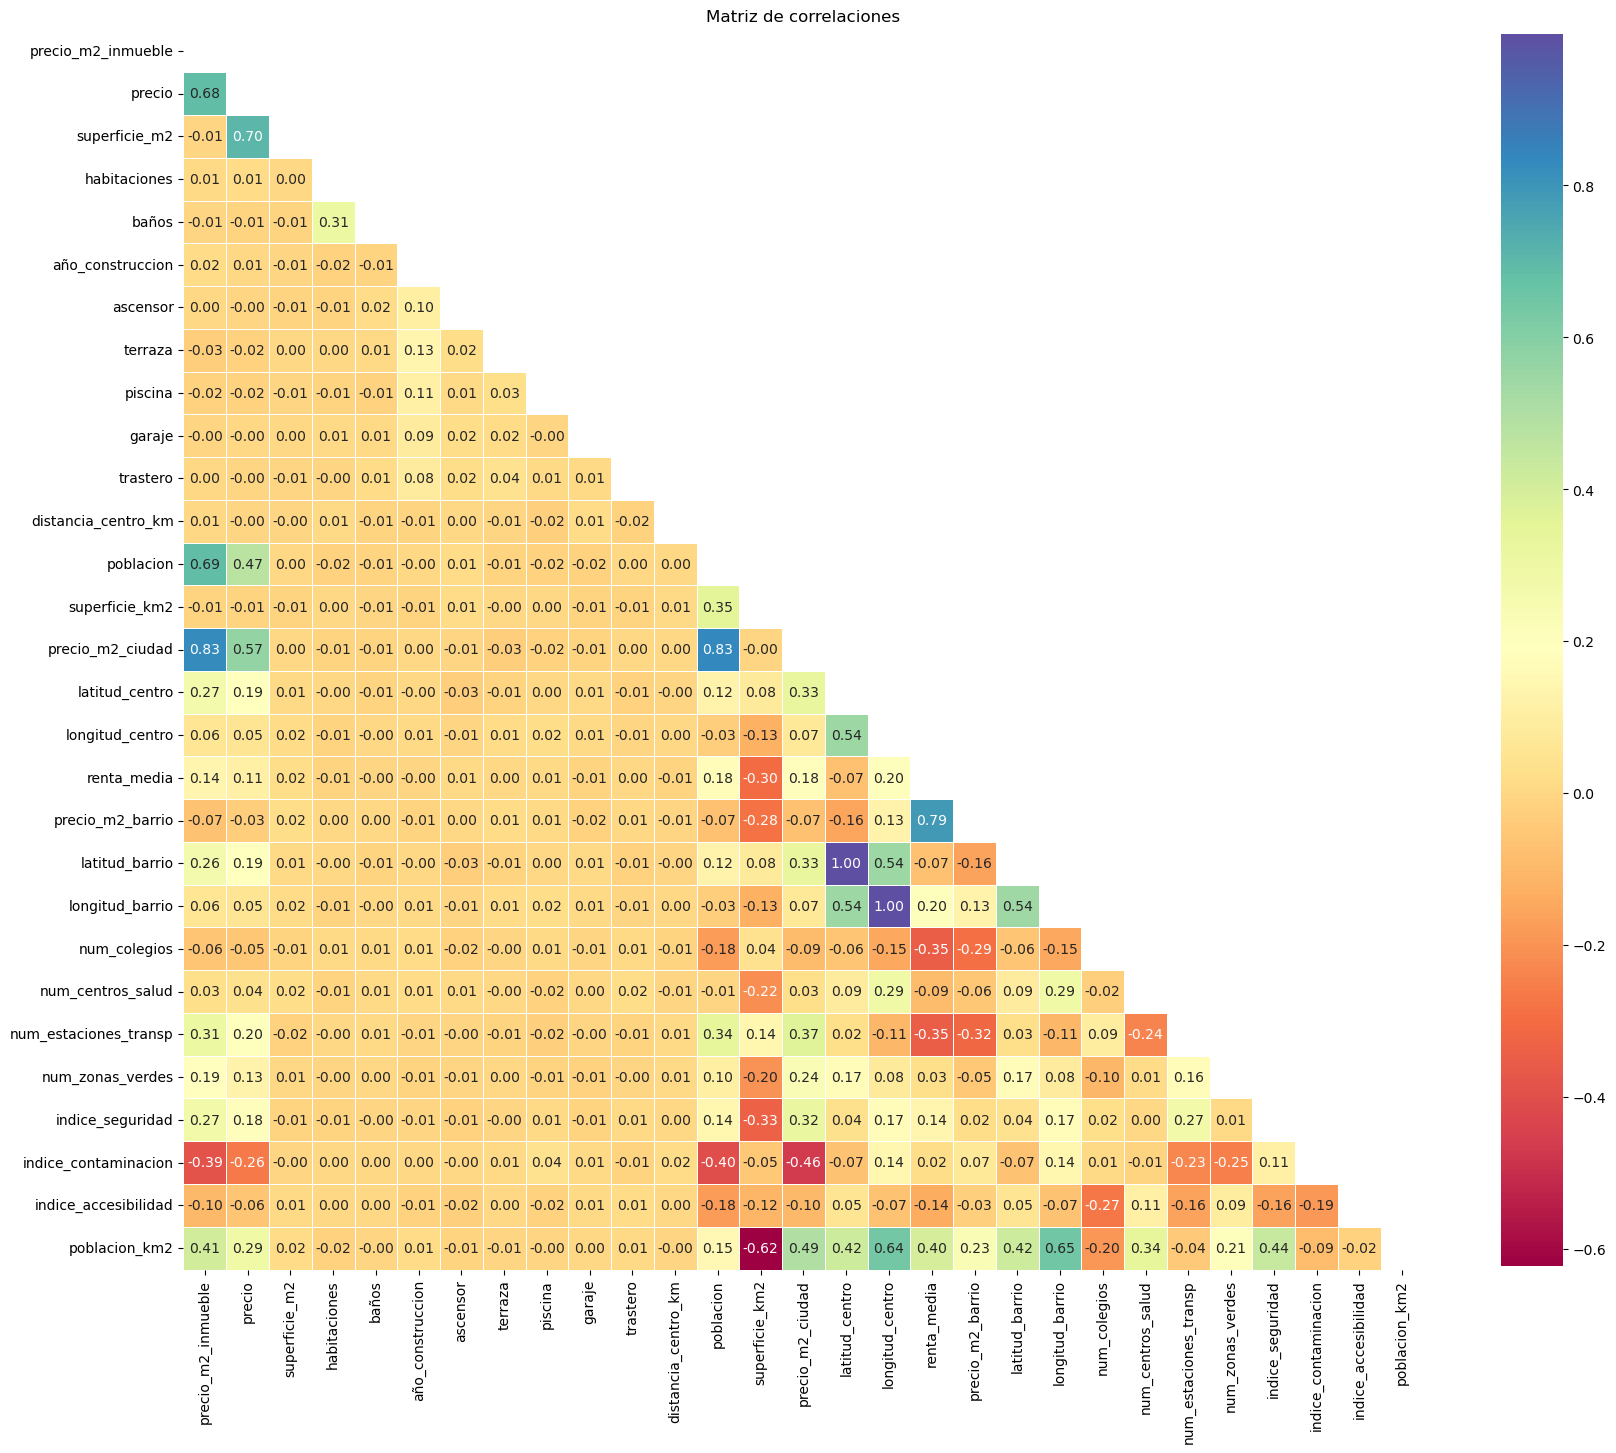

In [175]:
corr = df_prueba.drop(columns='id_propiedad').corr(numeric_only=True)



plt.figure(figsize=(20, 20))

mask = np.triu(np.ones_like(corr, dtype=bool)) # Crear máscara para la mitad superior

sns.heatmap(corr,
            mask=mask,
            cmap='Spectral', # Paleta de colores. 'viridis', 'rocket', 'mako','cubehelix', 'crest' 'GnBu'
            annot=True,
            fmt=".2f",  # Opcional: controla el formato de los números
            square=True,  # Mantiene cada celda cuadrada
            linewidths=0.5,  # Líneas entre celdas
            cbar_kws={"shrink": 0.8})  # Tamaño de la barra de color
            
plt.title("Matriz de correlaciones")
plt.show()

Observaciones:
* La superficie por metro cuadrado esta directamente relacionada con el precio.
* El precio por metro cuadrado medio de la ciudad esta muy relacionado con la población de la ciudad  
* El precio por metro cuadrado del barrio esta directamente bastante relacionado con la renta_media del barrio
* La latitud y longitud del centro de la ciudad esta totalmente relacionados con la latitud y longitud del barrio, lo que quiere decir que son variables redundantes.  

## Nulos

In [176]:
df_prueba.isnull().sum().sort_values(ascending=False)

distrito                 4300
precio_m2_inmueble        688
precio                    688
ascensor                  367
distancia_centro_km       359
habitaciones              351
piscina                   349
superficie_m2             347
terraza                   346
baños                     344
garaje                    344
trastero                  343
fecha_publicacion         322
precio_m2_barrio            0
latitud_barrio              0
longitud_barrio             0
num_colegios                0
num_centros_salud           0
indice_contaminacion        0
indice_seguridad            0
descripcion                 0
num_estaciones_transp       0
num_zonas_verdes            0
nivel_servicios             0
indice_accesibilidad        0
renta_media                 0
comunidad_autonoma          0
longitud_centro             0
latitud_centro              0
precio_m2_ciudad            0
superficie_km2              0
poblacion                   0
id_propiedad                0
planta    

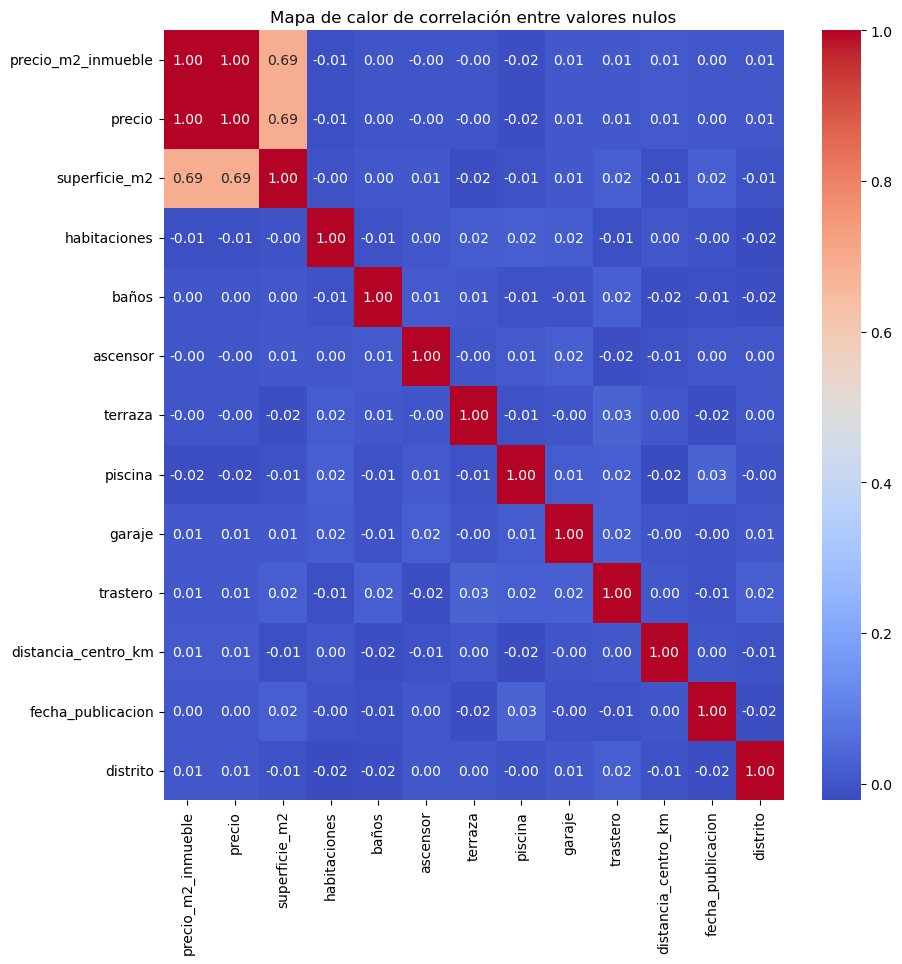

In [177]:
# Se buscan las columnas con nulos
columnas_nulos = df_prueba.columns[df_prueba.isnull().any()]

# Se crea una máscara que dice dónde hay nulos y dónde no, y se pasa a dataframe
nulos_binarios = pd.DataFrame(
    np.where(df_prueba[columnas_nulos].isnull(), 1, 0),
    columns=columnas_nulos,
    index=df_prueba.index
)

# Se hace la correlación
corr_nulos = nulos_binarios.corr()

# Se grafica en un mapa de calor
plt.figure(figsize=(10,10))
sns.heatmap(
    corr_nulos, cmap='coolwarm',
     annot=True,
     fmt=".2f"
)
plt.title("Mapa de calor de correlación entre valores nulos")
plt.show()


Observaciones:  
No se encuentra ningun patrón entre los nulos

## Outliers

In [178]:
numeric = df_prueba.select_dtypes(include='number')
df_prueba['precio_m2_inmueble'] = df['precio'] / df['superficie_m2']
numeric = numeric.drop(columns=['id_propiedad','ascensor','terraza','piscina','garaje','trastero']) # se quitan id y variables booleanas

iqr3 = (numeric.quantile(0.75) - numeric.quantile(0.25)) * 3

sup = numeric.median() + iqr3
inf = numeric.median() - iqr3

mins = numeric.min()
maxs = numeric.max()

out_sup = maxs > sup 
out_inf = mins < inf

print("¿Hay outliers?")
pd.concat([out_inf, out_sup], axis=1, keys=(['out_inf','out_sup']))

¿Hay outliers?


,out_inf,out_sup
precio_m2_inmueble,False,True
precio,False,True
superficie_m2,False,True
habitaciones,False,True
baños,False,True
año_construccion,False,False
distancia_centro_km,False,False
poblacion,False,False
superficie_km2,False,False
precio_m2_ciudad,False,False


In [179]:
# Visualización de la distribución y outliers

# for col in numeric.columns.tolist():
#     fig, ax = plt.subplots(1,2, figsize=(10,4))

#     sns.histplot(numeric[col], ax=ax[0])
#     sns.boxplot(x=numeric[col], whis=3, ax=ax[1])

#     plt.suptitle(col.capitalize(), fontsize=14)
#     plt.show()

### Precio_m2

In [180]:
# Outliers en precio m2 del inmueble

iqr = (df_prueba['precio_m2_inmueble'].quantile(0.75) - df_prueba['precio_m2_inmueble'].quantile(0.25)) * 3
sup = df_prueba['precio_m2_inmueble'].median() + iqr
print(f"{sup}€ desde el cual se considera un dato anómalo")

out_precio_m2 = df_prueba[df_prueba['precio_m2_inmueble'] > sup].sort_values(by='precio', ascending=False)
out_precio_m2_percent = round((len(out_precio_m2) / df['precio_m2_inmueble'].shape[0]) * 100, 2)

print(f"{len(out_precio_m2)} outliers, {out_precio_m2_percent}% de las viviendas")

out_precio_m2

8352.34556201394€ desde el cual se considera un dato anómalo
8 outliers, 0.11% de las viviendas


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2
1168,10548.338816,1169,madrid,retiro,Venta,piso,1282678.0,121.6,3,1,...,3,1,7,1,alto,9.3,5.5,4.6,"Apartamento en edificio, usualmente con varias...",5460.863809
1629,10173.430013,1630,barcelona,ciutat vella,Venta,ático,806753.0,79.3,1,1,...,4,4,1,2,alto,8.5,7.4,5.9,"Piso en la última planta, con vistas y terraza.",15701.668302
5949,8435.592865,5950,málaga,pedregalejo,Venta,piso,803912.0,95.3,5,<NA>,...,2,0,4,0,medio,8.8,8.6,4.4,"Apartamento en edificio, usualmente con varias...",1452.261307
602,9246.411765,603,madrid,retiro,Venta,dúplex,785945.0,85.0,5,<NA>,...,3,1,7,1,alto,9.3,5.5,4.6,Apartamento de dos niveles comunicados mediant...,5460.863809
987,8869.232532,988,madrid,arganzuela,Alquiler,estudio,774284.0,87.3,1,1,...,1,0,6,4,alto,6.5,6.6,6.4,"Vivienda de planta única, generalmente compacta.",5460.863809
179,8968.911023,180,madrid,retiro,Alquiler,piso,675359.0,75.3,3,1,...,3,1,7,1,alto,9.3,5.5,4.6,"Apartamento en edificio, usualmente con varias...",5460.863809
928,9869.651515,929,madrid,chamberí,Alquiler,chalet,651397.0,66.0,7,1,...,2,1,0,1,bajo,4.2,6.1,6.6,"Casa independiente, a menudo con jardín y mayo...",5460.863809
4895,8791.383738,4896,bilbao,indautxu,Alquiler,piso,616276.0,70.1,2,1,...,0,2,5,4,alto,6.8,6.5,7.0,"Apartamento en edificio, usualmente con varias...",8293.269231


### Precio

In [181]:
# Outliers en precio

iqr = (df_prueba['precio'].quantile(0.75) - df_prueba['precio'].quantile(0.25)) * 3
sup = df_prueba['precio'].median() + iqr
print(f"{sup}€ desde el cual se considera un dato anómalo")

out_precio = df_prueba[df_prueba['precio'] > sup].sort_values(by='precio', ascending=False)
out_precio_percent = round((len(out_precio) / df['precio'].shape[0]) * 100, 2)

print(f"{len(out_precio)} outliers, {out_precio_percent}% de las viviendas")

out_precio

748335.5€ desde el cual se considera un dato anómalo
20 outliers, 0.29% de las viviendas


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2
1168,10548.338816,1169,madrid,retiro,Venta,piso,1282678.0,121.600000,3,1,...,3,1,7,1,alto,9.3,5.5,4.6,"Apartamento en edificio, usualmente con varias...",5460.863809
67,5229.508541,68,madrid,salamanca,Venta,chalet,1087781.0,208.008265,1,1,...,1,3,3,1,medio,6.3,3.1,8.4,"Casa independiente, a menudo con jardín y mayo...",5460.863809
2206,4360.622088,2207,barcelona,sarrià-sant gervasi,Venta,piso,1025898.0,235.264139,2,2,...,1,3,2,1,medio,7.2,6.9,7.5,"Apartamento en edificio, usualmente con varias...",15701.668302
989,4832.519551,990,madrid,chamberí,Venta,dúplex,998925.0,206.708941,1,1,...,2,1,0,1,bajo,4.2,6.1,6.6,Apartamento de dos niveles comunicados mediant...,5460.863809
2710,3740.560275,2711,valencia,benimaclet,Venta,piso,876196.0,234.241914,2,2,...,1,2,2,3,medio,4.1,7.0,7.7,"Apartamento en edificio, usualmente con varias...",5943.536404
2653,8308.130930,2654,barcelona,sarrià-sant gervasi,Venta,estudio,875677.0,105.400000,1,1,...,1,3,2,1,medio,7.2,6.9,7.5,"Vivienda de planta única, generalmente compacta.",15701.668302
4354,4420.415075,4355,sevilla,los remedios,Alquiler,piso,873513.0,197.608818,1,<NA>,...,3,2,1,0,medio,6.7,7.4,6.1,"Apartamento en edificio, usualmente con varias...",5000.000000
171,4976.781699,172,madrid,centro,Venta,piso,850997.0,170.993435,5,1,...,1,0,3,4,medio,5.7,5.7,6.5,"Apartamento en edificio, usualmente con varias...",5460.863809
4740,4366.715302,4741,bilbao,casco viejo,Venta,piso,831438.0,190.403528,2,1,...,4,0,5,2,alto,6.6,4.1,7.5,"Apartamento en edificio, usualmente con varias...",8293.269231
134,4473.519994,135,madrid,centro,Venta,piso,821547.0,183.646659,5,2,...,1,0,3,4,medio,5.7,5.7,6.5,"Apartamento en edificio, usualmente con varias...",5460.863809


### Superficie_m2

In [182]:
# Outliers en superficie

iqr = (df_prueba['superficie_m2'].quantile(0.75) - df_prueba['superficie_m2'].quantile(0.25)) * 3
sup = df_prueba['superficie_m2'].median() + iqr
print(f"{sup}m2 desde el cual se considera un dato anómalo")

out_superficie = df_prueba[df_prueba['superficie_m2'] > sup].sort_values(by='precio', ascending=False)
out_superficie_percent = round((len(out_superficie) / df_prueba['superficie_m2'].shape[0]) * 100, 2)

print(f"{len(out_superficie)} outliers, {out_superficie_percent}% de las viviendas")
out_superficie.head(3)

161.29999999999995m2 desde el cual se considera un dato anómalo
29 outliers, 0.41% de las viviendas


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2
67,5229.508541,68,madrid,salamanca,Venta,chalet,1087781.0,208.008265,1,1,...,1,3,3,1,medio,6.3,3.1,8.4,"Casa independiente, a menudo con jardín y mayo...",5460.863809
2206,4360.622088,2207,barcelona,sarrià-sant gervasi,Venta,piso,1025898.0,235.264139,2,2,...,1,3,2,1,medio,7.2,6.9,7.5,"Apartamento en edificio, usualmente con varias...",15701.668302
989,4832.519551,990,madrid,chamberí,Venta,dúplex,998925.0,206.708941,1,1,...,2,1,0,1,bajo,4.2,6.1,6.6,Apartamento de dos niveles comunicados mediant...,5460.863809


In [183]:
# Posibles inmuebles grandes con precios bajos

print(f"Superficie en m2 mínima para considerarse outlier {out_superficie['superficie_m2'].round(2).min()}\nCuantil 25 de los precios m2 de las casas grandes: {out_superficie['precio_m2_inmueble'].quantile(0.25).round(2)}€\nCuantil 25 de los precios m2 en todo el dataset: {df_prueba['precio_m2_inmueble'].mean().round(2)}€")

# Se filtran inmuebles de gran superficie cuyo precio m2 esta por debajo del cuantil 25
filtro = out_superficie['precio_m2_inmueble'] < out_superficie['precio_m2_inmueble'].quantile(0.25)
print(f"Cantidad inmuebles grandes a bajos precios m2: {out_superficie[filtro].shape[0]}")
grandes_baratas = out_superficie[filtro]
display(grandes_baratas[['ciudad','barrio','superficie_m2','precio','precio_m2_inmueble','precio_m2_barrio','precio_m2_ciudad']])


Superficie en m2 mínima para considerarse outlier 163.2
Cuantil 25 de los precios m2 de las casas grandes: 2854.08€
Cuantil 25 de los precios m2 en todo el dataset: 3870.77€
Cantidad inmuebles grandes a bajos precios m2: 7


,ciudad,barrio,superficie_m2,precio,precio_m2_inmueble,precio_m2_barrio,precio_m2_ciudad
6925,zaragoza,san josé,198.349228,498395.0,2512.714592,4682.0,2800
3377,valencia,ensanche,185.283701,486909.0,2627.910593,6851.0,3000
3504,valencia,benimaclet,197.786142,486818.0,2461.335233,4562.0,3000
2873,valencia,campanar,165.546772,460056.0,2779.009183,5726.0,3000
3241,valencia,ruzafa,172.195739,445667.0,2588.141859,6182.0,3000
3224,valencia,el carmen,168.915816,422683.0,2502.329325,6975.0,3000
3629,valencia,campanar,188.937411,413192.0,2186.925276,5726.0,3000


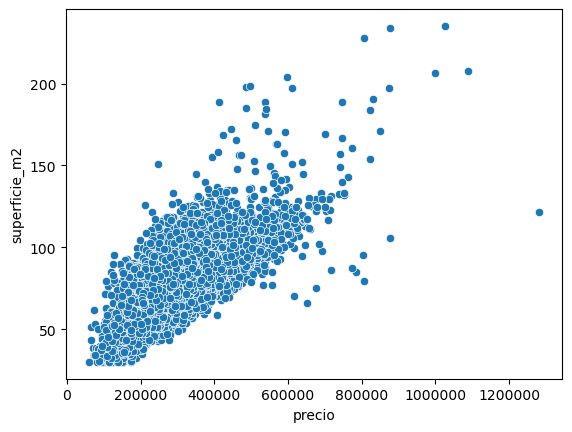

In [184]:
# Outliers en precio y superficie

plt.gifure=(7,4)
sns.scatterplot(
    data=df_prueba,
    x='precio',
    y='superficie_m2'
)
plt.ticklabel_format(style='plain', axis='x') # Para evitar que se muestre en notación cienfífica
plt.show()

In [185]:
# Outliers en habitaciones

iqr = (df_prueba['habitaciones'].quantile(0.75) - df_prueba['habitaciones'].quantile(0.25)) * 3
sup = df['habitaciones'].median() + iqr
print(f"{sup} habitaciones desde el cual se considera un dato anómalo")

out_habitaciones = df_prueba[df_prueba['habitaciones'] > sup].sort_values(by='precio', ascending=False)
out_habitaciones_percent = round((len(out_habitaciones) / df_prueba['habitaciones'].shape[0]) * 100, 2)

print(f"{len(out_habitaciones)} outliers, {out_habitaciones_percent}% de las viviendas")
out_habitaciones[['precio','superficie_m2','habitaciones','baños']]

8.0 habitaciones desde el cual se considera un dato anómalo
2 outliers, 0.03% de las viviendas


,precio,superficie_m2,habitaciones,baños
2297,533812.0,89.5,9,1
707,386935.0,85.5,9,<NA>


In [186]:
print(f"Media de habitaciones en el dataset: {df_prueba['habitaciones'].mean().round(2)}\nMedia de superficie: {df_prueba['superficie_m2'].mean().round(2)}")

Media de habitaciones en el dataset: 2.42
Media de superficie: 81.09


Observaciones:  
Los outliers en habitaciones hace entender que los datos de esta columna no son fiables

In [187]:
# Outliers en baños

iqr = (df_prueba['baños'].quantile(0.75) - df_prueba['baños'].quantile(0.25)) * 3
sup = df_prueba['baños'].median() + iqr
print(f"{sup} baños desde el cual se considera un dato anómalo")

out_baños = df_prueba[df_prueba['baños'] > sup].sort_values(by='precio', ascending=False)
out_baños_percent = round((len(out_baños) / df_prueba['baños'].shape[0]) * 100, 2)

print(f"{len(out_baños)} outliers, {out_baños_percent}% de las viviendas")
out_baños

1.0 baños desde el cual se considera un dato anómalo
1119 outliers, 15.99% de las viviendas


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2
2206,4360.622088,2207,barcelona,sarrià-sant gervasi,Venta,piso,1025898.0,235.264139,2,2,...,1,3,2,1,medio,7.2,6.9,7.5,"Apartamento en edificio, usualmente con varias...",15701.668302
2710,3740.560275,2711,valencia,benimaclet,Venta,piso,876196.0,234.241914,2,2,...,1,2,2,3,medio,4.1,7.0,7.7,"Apartamento en edificio, usualmente con varias...",5943.536404
134,4473.519994,135,madrid,centro,Venta,piso,821547.0,183.646659,5,2,...,1,0,3,4,medio,5.7,5.7,6.5,"Apartamento en edificio, usualmente con varias...",5460.863809
2303,4820.296296,2304,barcelona,sarrià-sant gervasi,Venta,chalet,773379.0,160.442212,2,2,...,1,3,2,1,medio,7.2,6.9,7.5,"Casa independiente, a menudo con jardín y mayo...",15701.668302
4737,5336.142857,4738,bilbao,abando,Venta,piso,747060.0,140.000000,4,2,...,3,1,1,3,medio,7.4,7.9,9.0,"Apartamento en edificio, usualmente con varias...",8293.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,NaN,6767,zaragoza,san josé,Venta,piso,NaN,NaN,4,2,...,2,1,2,1,medio,6.0,8.4,9.9,"Apartamento en edificio, usualmente con varias...",693.730730
6785,NaN,6786,zaragoza,delicias,Venta,ático,NaN,103.100000,3,2,...,4,1,2,0,medio,3.2,5.4,6.0,"Piso en la última planta, con vistas y terraza.",693.730730
6841,NaN,6842,zaragoza,la romareda,Alquiler,piso,NaN,59.500000,3,2,...,2,2,3,1,medio,4.7,10.0,6.5,"Apartamento en edificio, usualmente con varias...",693.730730
6855,NaN,6856,zaragoza,san josé,Venta,piso,NaN,67.000000,3,2,...,2,1,2,1,medio,6.0,8.4,9.9,"Apartamento en edificio, usualmente con varias...",693.730730


In [188]:
out_baños.groupby(['habitaciones','baños']).agg(
    superficie_max=('superficie_m2','max'),
    superficie_min=('superficie_m2','min'),
    superficie_media=('superficie_m2','mean'),
).round(2)

superficie_max  superficie_min  superficie_media
habitaciones baños                                                  
2            2              235.26            30.0             81.92
3            2              148.93            30.0             78.97
             3              139.00            30.0             79.27
4            2              143.50            30.0             78.56
             3              125.50            30.0             80.48
             4               89.70            60.6             75.63
5            2              183.65            33.6             83.52
             3              135.30            30.0             80.21
             4               99.70            45.3             76.28
             5              109.30            91.0            100.15
6            2              112.60            32.2             78.29
             3              119.00            44.0             76.92
             4              197.79            90.5            144.14
             5               67.70            67.7             67.70
7            2              106.50            59.4             82.46
             3               78.20            78.2             78.20

Observaciones:
Los datos de las columnas habitaciones y baños no estan bien recogidos, así que se prescindirá de estas dos variables.


In [189]:
# Se eliminan habitaciones y baños

df_prueba.drop(columns=['habitaciones','baños'], inplace=True)
df_prueba.columns

Index(['precio_m2_inmueble', 'id_propiedad', 'ciudad', 'barrio',
       'tipo_operacion', 'tipo_inmueble', 'precio', 'superficie_m2', 'estado',
       'año_construccion', 'planta', 'ascensor', 'terraza', 'piscina',
       'garaje', 'trastero', 'distancia_centro_km', 'fecha_publicacion',
       'comunidad_autonoma', 'poblacion', 'superficie_km2', 'precio_m2_ciudad',
       'latitud_centro', 'longitud_centro', 'distrito', 'renta_media',
       'precio_m2_barrio', 'latitud_barrio', 'longitud_barrio', 'num_colegios',
       'num_centros_salud', 'num_estaciones_transp', 'num_zonas_verdes',
       'nivel_servicios', 'indice_seguridad', 'indice_contaminacion',
       'indice_accesibilidad', 'descripcion', 'poblacion_km2'],
      dtype='object')

## Impacto de los servicios urbanos con PCA  
 
Se quiere ver la relación de los servicios con el precio por m2 de la vivienda y la renta media. Para ello se usará Principal Component Analysis que muestra esta relación entre más de dos variables a la vez. 

In [190]:
# Se quitarán variables numéricas que son redundantes (habiendo precio por m2 no se necesita ni precio ni superficie por m2). También se quitarán variables binarias y categóricas debido a que dispersan la varianza y dificulta al PCA para encontrar patrones.

variables_numericas = df_prueba.select_dtypes(include='number').drop(columns=['id_propiedad', 'precio', 'superficie_m2', 'precio_m2_barrio', 'precio_m2_ciudad','latitud_centro', 'longitud_centro', 'latitud_barrio', 'longitud_barrio','poblacion','superficie_km2', 'ascensor','terraza', 'piscina', 'garaje', 'trastero'])

print(variables_numericas.columns)
variables_numericas.head(3)

Index(['precio_m2_inmueble', 'año_construccion', 'distancia_centro_km',
       'renta_media', 'num_colegios', 'num_centros_salud',
       'num_estaciones_transp', 'num_zonas_verdes', 'indice_seguridad',
       'indice_contaminacion', 'indice_accesibilidad', 'poblacion_km2'],
      dtype='object')


,precio_m2_inmueble,año_construccion,distancia_centro_km,renta_media,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,indice_seguridad,indice_contaminacion,indice_accesibilidad,poblacion_km2
0,NaN,2000,4.10,31325.0,1,0,6,4,6.5,6.6,6.4,5460.863809
1,NaN,1996,5.26,31325.0,1,0,6,4,6.5,6.6,6.4,5460.863809
2,5334.879094,1996,5.13,28477.0,1,3,3,1,6.3,3.1,8.4,5460.863809


In [191]:
# Se sustituyen nulos por la media


imputer = SimpleImputer(strategy='mean')

df_imputado = pd.DataFrame(imputer.fit_transform(variables_numericas), columns=variables_numericas.columns)

print(df_imputado.head(3))

   precio_m2_inmueble  año_construccion  distancia_centro_km  renta_media  \
0         3870.769129            2000.0                 4.10      31325.0   
1         3870.769129            1996.0                 5.26      31325.0   
2         5334.879094            1996.0                 5.13      28477.0   

   num_colegios  num_centros_salud  num_estaciones_transp  num_zonas_verdes  \
0           1.0                0.0                    6.0               4.0   
1           1.0                0.0                    6.0               4.0   
2           1.0                3.0                    3.0               1.0   

   indice_seguridad  indice_contaminacion  indice_accesibilidad  poblacion_km2  
0               6.5                   6.6                   6.4    5460.863809  
1               6.5                   6.6                   6.4    5460.863809  
2               6.3                   3.1                   8.4    5460.863809  


In [192]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(df_imputado)
X_scaled = pd.DataFrame(X_scaled_array, columns=df_imputado.columns, index=df_imputado.index)
X_scaled.head(3)

,precio_m2_inmueble,año_construccion,distancia_centro_km,renta_media,num_colegios,num_centros_salud,num_estaciones_transp,num_zonas_verdes,indice_seguridad,indice_contaminacion,indice_accesibilidad,poblacion_km2
0,0.00000,0.550067,-0.624299,0.638851,-0.763281,-1.133249,1.574274,1.682387,-0.116455,-0.006704,-0.503583,-0.243062
1,0.00000,0.337894,0.167130,0.638851,-0.763281,-1.133249,1.574274,1.682387,-0.116455,-0.006704,-0.503583,-0.243062
2,1.57288,0.337894,0.078436,0.139293,-0.763281,1.575096,0.051064,-0.409019,-0.242802,-2.241442,0.884955,-0.243062


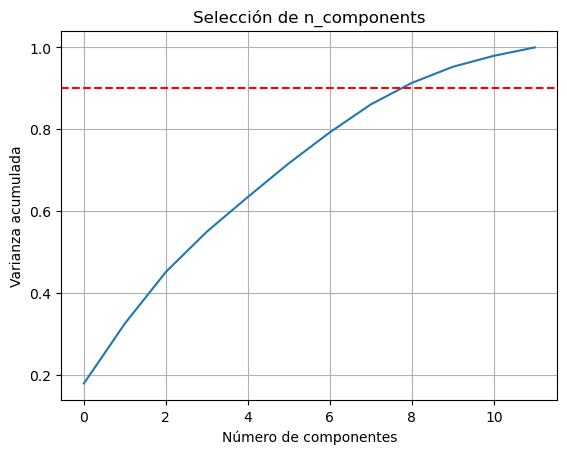

In [193]:
# Encontrando el numero de componentes óptimo que explique el 90% (y=0.90) de la varianza de la totalidad de los datos


# PCA sin especificar n_components
pca = PCA()
pca.fit(X_scaled)

# Calcular varianza acumulada
var_acumulada = np.cumsum(pca.explained_variance_ratio_)


plt.plot(var_acumulada)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Selección de n_components')
plt.grid(True)
plt.show()


In [194]:
# Se realiza PCA con la cantidad de componentes que explican el 90% de al varianza de los datos

n_components = 8
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)


# print(pca.feature_names_in_)


componentes = pd.DataFrame(
    pca.components_,
    columns=variables_numericas.columns,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)
# Se muestra el dataframe de componentes
# Cada componente tiene pesos de diferentes variables
componentes.T.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
precio_m2_inmueble,0.486,0.235,0.045,-0.010,-0.064,0.025,-0.206,-0.338
año_construccion,0.004,0.001,-0.025,0.105,-0.654,0.728,0.171,0.029
distancia_centro_km,-0.001,0.008,0.003,-0.032,0.710,0.681,-0.165,-0.041
renta_media,0.307,-0.433,-0.195,-0.423,-0.103,0.014,-0.278,-0.013
num_colegios,-0.213,0.368,-0.241,0.382,-0.061,-0.033,-0.418,0.083
num_centros_salud,0.125,-0.257,0.120,0.758,0.059,-0.036,-0.083,0.014
num_estaciones_transp,0.155,0.614,-0.013,-0.089,0.069,-0.002,0.323,-0.013
num_zonas_verdes,0.279,0.125,0.340,-0.074,0.020,0.015,-0.046,0.857
indice_seguridad,0.375,0.119,-0.424,0.113,0.127,-0.042,0.447,-0.042
indice_contaminacion,-0.245,-0.261,-0.490,0.049,0.124,0.012,0.368,0.299


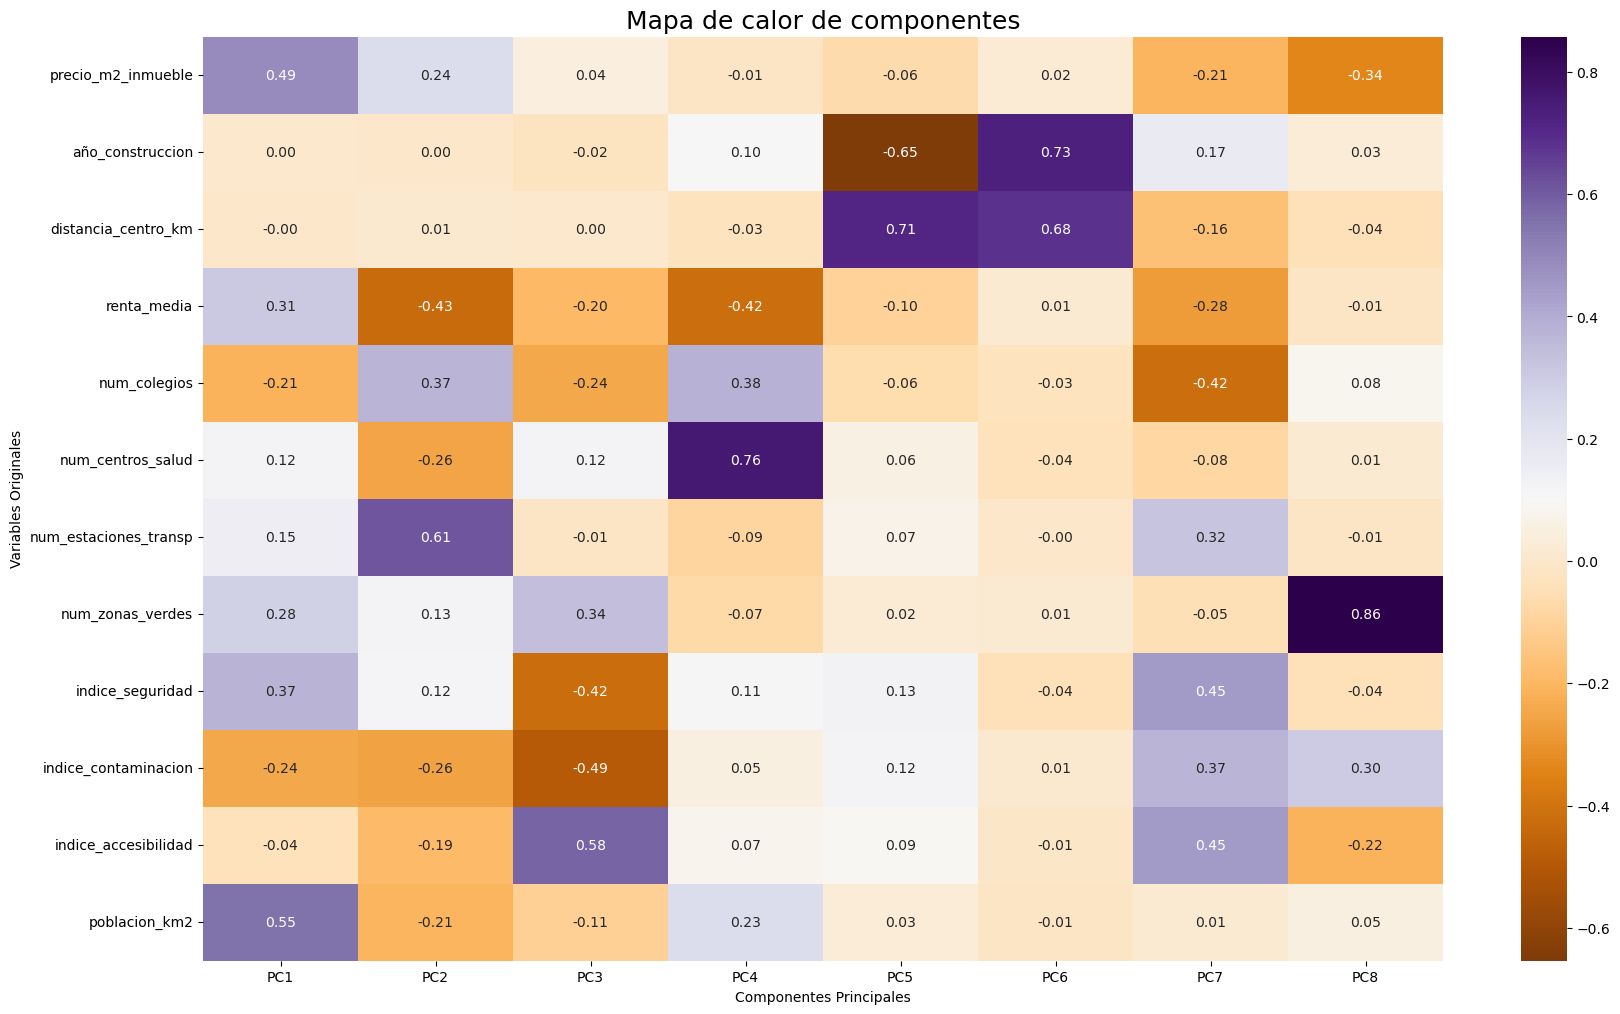

In [195]:
# Se visualiza en forma de mapa de calor para mejor contraste dela información

plt.figure(figsize=(20, 12))

sns.heatmap(
    componentes.T,
    cmap='PuOr', #'Spectral','vlag'
    fmt=".2f",
    annot=True)

plt.title("Mapa de calor de componentes", fontsize=18)
plt.xlabel("Componentes Principales")
plt.ylabel("Variables Originales")
plt.show()

Observaciones centradas en las variables donde el precio por m2 es bajo:
* Bajo precio por m2 en viviendas cerca de gran cantidad de zonas verdes, con alto nivel de contaminación y bajo nivel de accesibilidad.
* Valor bajo del inmueble en zonas de bajo nivel adquisitivo con pocos colegios, bien conectadas por el transporte y buena accesibilidad pero alta contaminación.

In [196]:
df_prueba.groupby(['indice_seguridad','indice_accesibilidad']).agg({'id_propiedad':'count'})

id_propiedad
indice_seguridad indice_accesibilidad              
3.2              6.0                            191
3.4              7.7                            179
4.1              7.7                            204
4.2              6.6                            236
4.7              6.5                            194
5.6              8.4                            193
5.7              6.5                            237
5.8              6.8                            190
                 8.7                            183
6.0              9.9                            225
6.1              5.4                            190
                 7.0                            217
6.3              8.4                            236
6.4              7.1                            426
                 8.5                            207
6.5              6.4                            271
6.6              7.5                            215
                 10.0                           177
6.7              6.1                            201
6.8              7.0                            192
7.2              7.5                            253
7.4              9.0                            186
7.7              8.1                            202
7.8              5.2                            225
8.0              6.1                            167
                 8.2                            210
                 8.6                            234
8.1              4.2                            191
8.5              5.9                            231
8.8              4.4                            177
9.3              4.6                            286
10.0             8.4                            274

## Precio m2 por ciudad y barrio  
Se analiza cómo varía el precio según la ciudad y el barrio para áreas con mayores precios y posbiles oportunidades.  
Se buscarán barrios que tengan un precio menor a la media de la ciudad y luego se localizarán los inmuebles con menor precio que la media de precio del barrio.

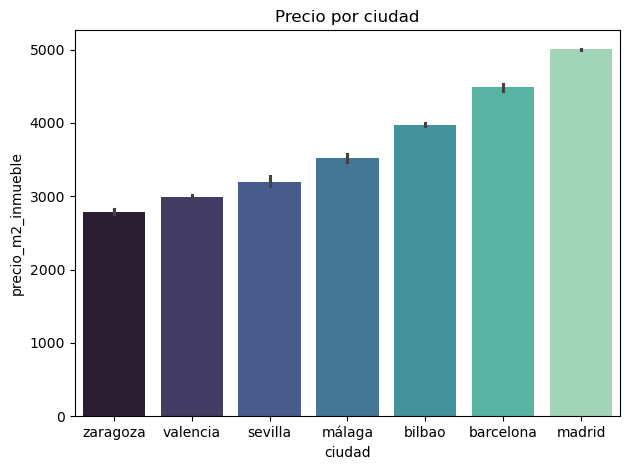

In [197]:
df_prueba = df.copy()

ciudad = df_prueba.groupby(['ciudad','barrio']).agg({'precio_m2_inmueble':'median'}).sort_values(by='precio_m2_inmueble').reset_index()

plt.figsize=(7,4)

sns.barplot(
    data = ciudad, 
    x='ciudad', 
    y='precio_m2_inmueble', 
    hue='ciudad', 
    palette='mako'
    )

plt.title("Precio por ciudad")
plt.tight_layout()
plt.show()

In [198]:
# Barrios más baratos

barrios = df_prueba.groupby(['ciudad','barrio']).agg({'precio_m2_inmueble':'mean','precio_m2_barrio':'max','precio_m2_ciudad':'max'}).sort_values(by='precio_m2_inmueble').reset_index().round(2)
barrios.head(5)

,ciudad,barrio,precio_m2_inmueble,precio_m2_barrio,precio_m2_ciudad
0,zaragoza,san josé,2775.61,4682.0,2800
1,zaragoza,la romareda,2785.56,4232.0,2800
2,zaragoza,delicias,2836.70,4633.0,2800
3,zaragoza,centro,2844.98,5968.0,2800
4,valencia,ruzafa,2936.25,6182.0,3000


In [199]:
# Se hace comprobación con la ciudad de Zaragoza
filtro = df_prueba['ciudad'] == 'zaragoza'
df_prueba[filtro].groupby("barrio").agg({'precio_m2_inmueble':'mean','precio_m2_barrio':'max'})

,precio_m2_inmueble,precio_m2_barrio
barrio,,
centro,2844.976314,5968.0
delicias,2836.696781,4633.0
la romareda,2785.561934,4232.0
san josé,2775.608267,4682.0


### El precio m2 por barrio esta mal calculado. Se procede a recalcular la columna.

In [200]:
# Se recalcula la columna precio_2_barrio en f_prueba y df original

df['precio_m2_barrio'] = df.groupby(['ciudad','barrio'])['precio_m2_inmueble'].transform("mean")
df_prueba['precio_m2_barrio'] = df_prueba.groupby(['ciudad','barrio'])['precio_m2_inmueble'].transform("mean")

In [201]:
# Inmuebles donde el precio por metro cuadrado es menor a la cuarta parte del precio del dataset

limite_precio_barato = df_prueba['precio_m2_inmueble'].quantile(0.25)
print(f"Precio cuantil 25: {limite_precio_barato}")
oportunidades_inmueble = df_prueba[df_prueba['precio_m2_inmueble'] < limite_precio_barato]

print(f"Inmuebles más baratos:\n{oportunidades_inmueble.shape[0]} inmuebles \n")

oportunidades_inmueble.groupby(['ciudad','barrio']).agg(
    precio_m2_oportunidades=('precio_m2_inmueble','mean'),
    precio_m2_barrio = ('precio_m2_barrio','max'),
    precio_m2_ciudad=('precio_m2_ciudad','max'),
    recuento_inmuebles=('id_propiedad','count')
    ).round(2).sort_values(by='precio_m2_barrio')

Precio cuantil 25: 3102.1881462530646
Inmuebles más baratos:
1578 inmuebles 



precio_m2_oportunidades  precio_m2_barrio  \
ciudad    barrio                                                      
zaragoza  san josé                        2547.68           2775.61   
          la romareda                     2600.68           2785.56   
          delicias                        2585.94           2836.70   
          centro                          2605.86           2844.98   
valencia  ruzafa                          2638.46           2936.25   
          ensanche                        2665.50           3022.88   
          campanar                        2646.39           3025.21   
          benimaclet                      2690.46           3032.30   
          el carmen                       2638.13           3032.78   
sevilla   macarena                        2749.25           3165.58   
          triana                          2727.38           3174.03   
          santa cruz                      2786.95           3223.23   
          nervión                         2791.06           3275.81   
          los remedios                    2748.39           3303.80   
málaga    la malagueta                    2745.16           3466.42   
          el palo                         2848.57           3479.36   
          centro                          2741.44           3555.90   
          pedregalejo                     2839.44           3625.00   
bilbao    casco viejo                     2898.13           3967.72   
          deusto                          2872.31           3996.74   
          indautxu                        2900.32           4027.87   
          abando                          2901.62           4029.57   
barcelona sants-montjuïc                  3026.19           4499.76   
          gràcia                          2794.05           4503.22   
          ciutat vella                    3029.86           4525.41   
          eixample                        2046.11           4534.58   
madrid    centro                          2840.70           5010.98   

                          precio_m2_ciudad  recuento_inmuebles  
ciudad    barrio                                                
zaragoza  san josé                    2800                 155  
          la romareda                 2800                 140  
          delicias                    2800                 117  
          centro                      2800                 124  
valencia  ruzafa                      3000                 106  
          ensanche                    3000                  98  
          campanar                    3000                 105  
          benimaclet                  3000                 100  
          el carmen                   3000                 105  
sevilla   macarena                    3200                  80  
          triana                      3200                  87  
          santa cruz                  3200                  79  
          nervión                     3200                  73  
          los remedios                3200                  62  
málaga    la malagueta                3500                  31  
          el palo                     3500                  30  
          centro                      3500                  24  
          pedregalejo                 3500                  24  
bilbao    casco viejo                 4000                  11  
          deusto                      4000                   7  
          indautxu                    4000                   5  
          abando                      4000                   7  
barcelona sants-montjuïc              4500                   2  
          gràcia                      4500                   2  
          ciutat vella                4500                   1  
          eixample                    4500                   1  
madrid    centro                      5000                   2

Obsevaciones:  
* Se observa que Zaragoza es la ciudad más barata seguida de Valencia y Sevilla según precio por metro cuadrado

## Características de la propiedad  

Se excluyen habitaciones y baños al ser variables las cuales no se han recogido correctamente. 

,precio_m2_inmueble
tipo_inmueble,
chalet,3849.255240
estudio,3854.188551
ático,3861.977757
dúplex,3867.959254
piso,3879.094286


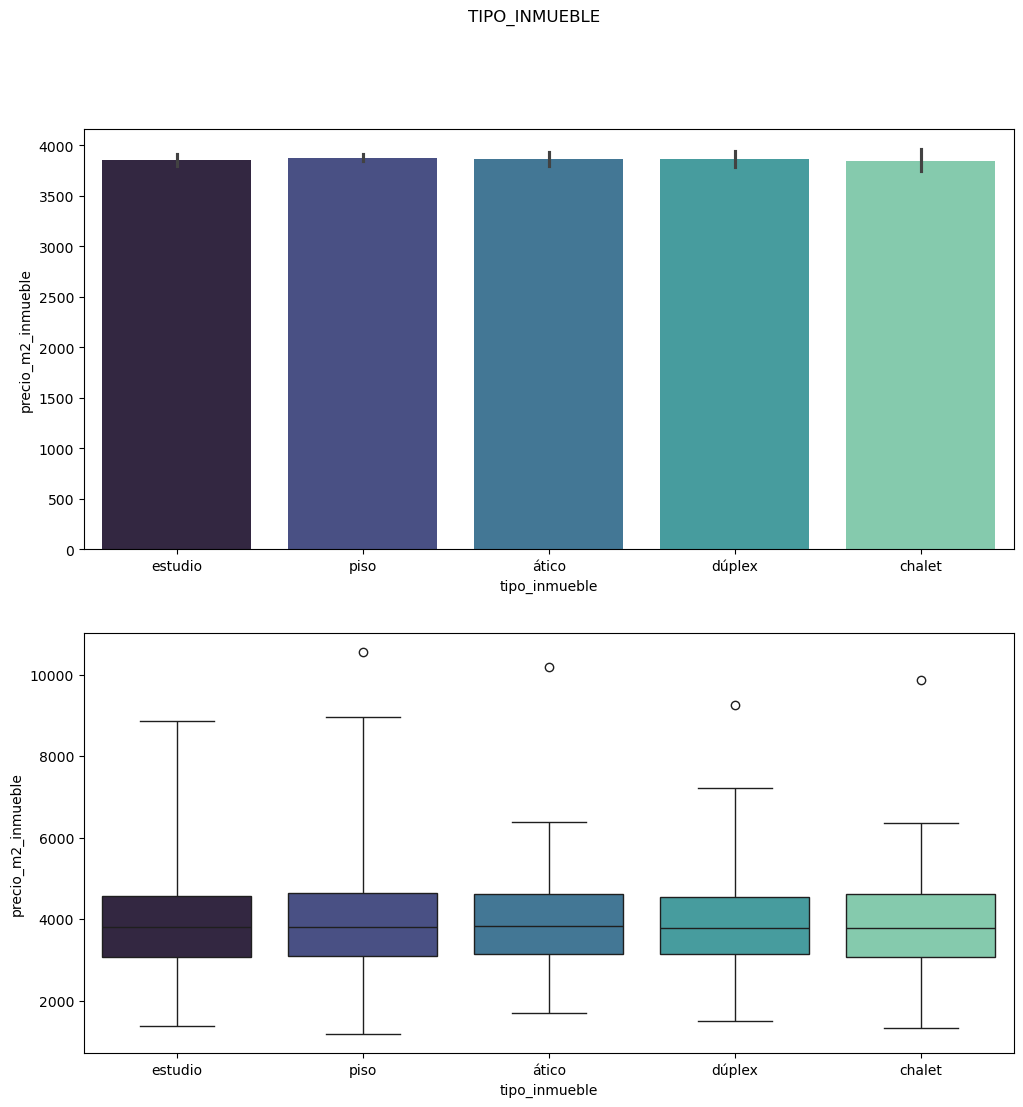

,precio_m2_inmueble
estado,
reformado,3845.112044
buen estado,3866.119886
obra nueva,3884.975107
a reformar,3948.899633


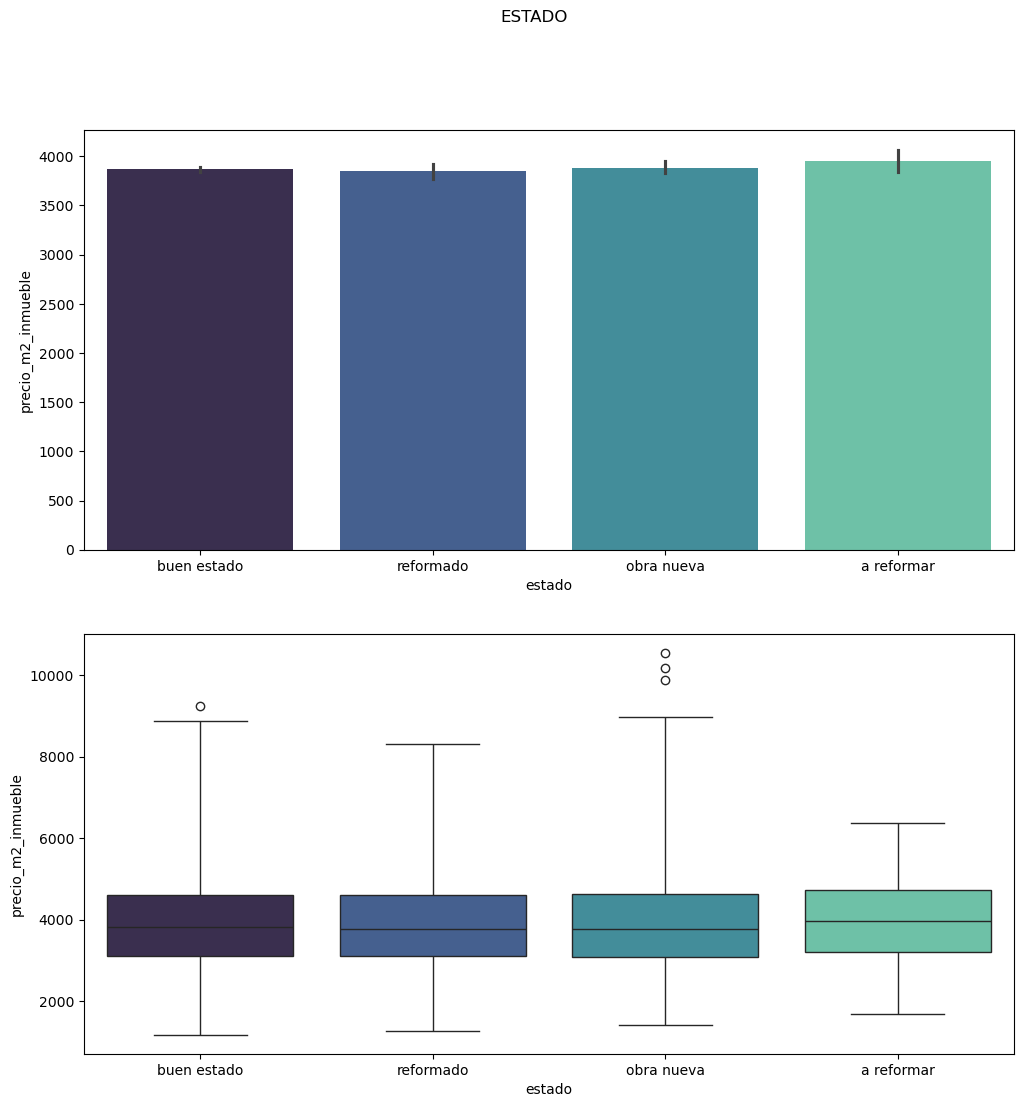

,precio_m2_inmueble
planta,
octavo,3792.769347
segundo,3840.904261
bajo,3851.151280
séptimo,3851.583210
sexto,3857.567439
primero,3881.627023
tercero,3881.682030
quinto,3892.004557
cuarto,3899.751598


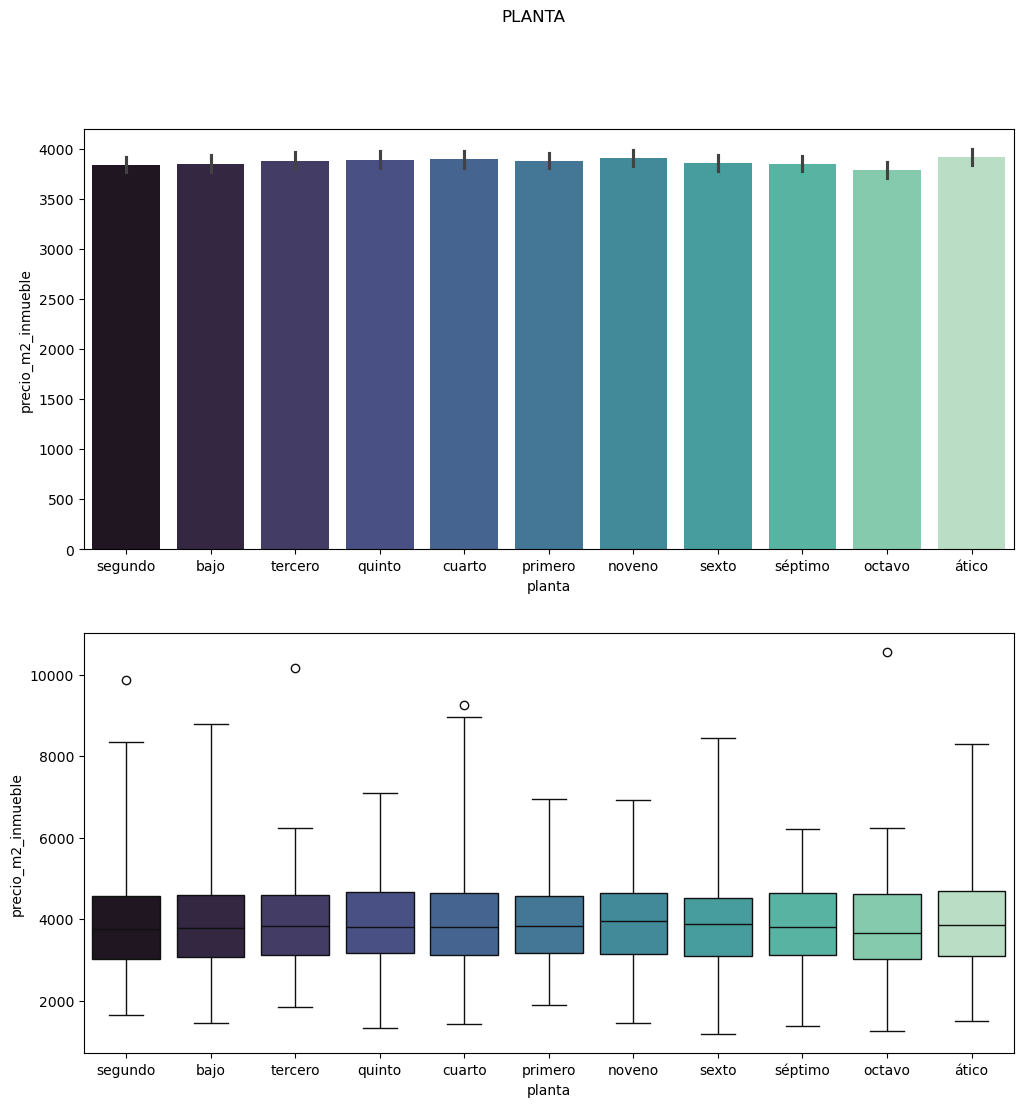

,precio_m2_inmueble
ascensor,
0,3871.418051
1,3875.338569


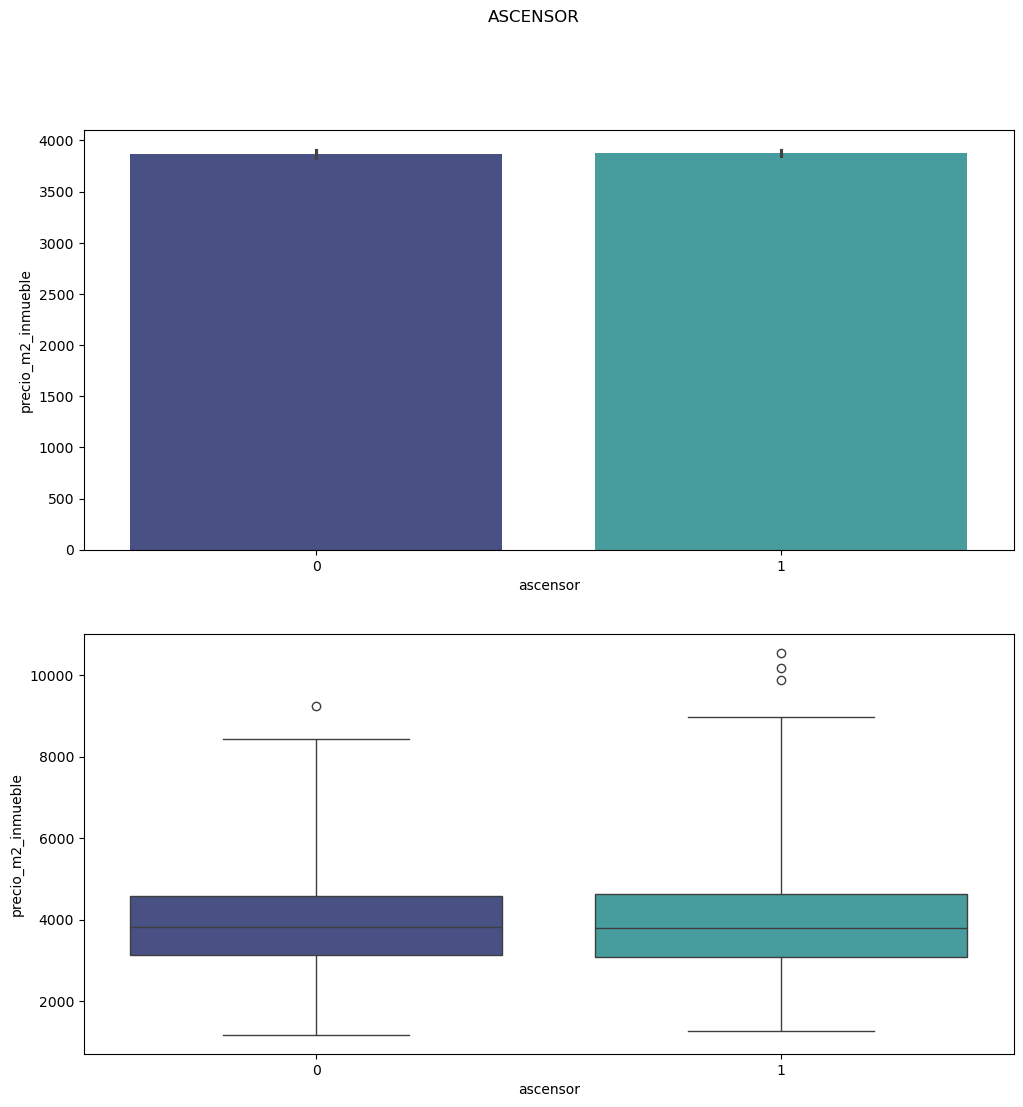

,precio_m2_inmueble
terraza,
1,3836.228678
0,3896.073050


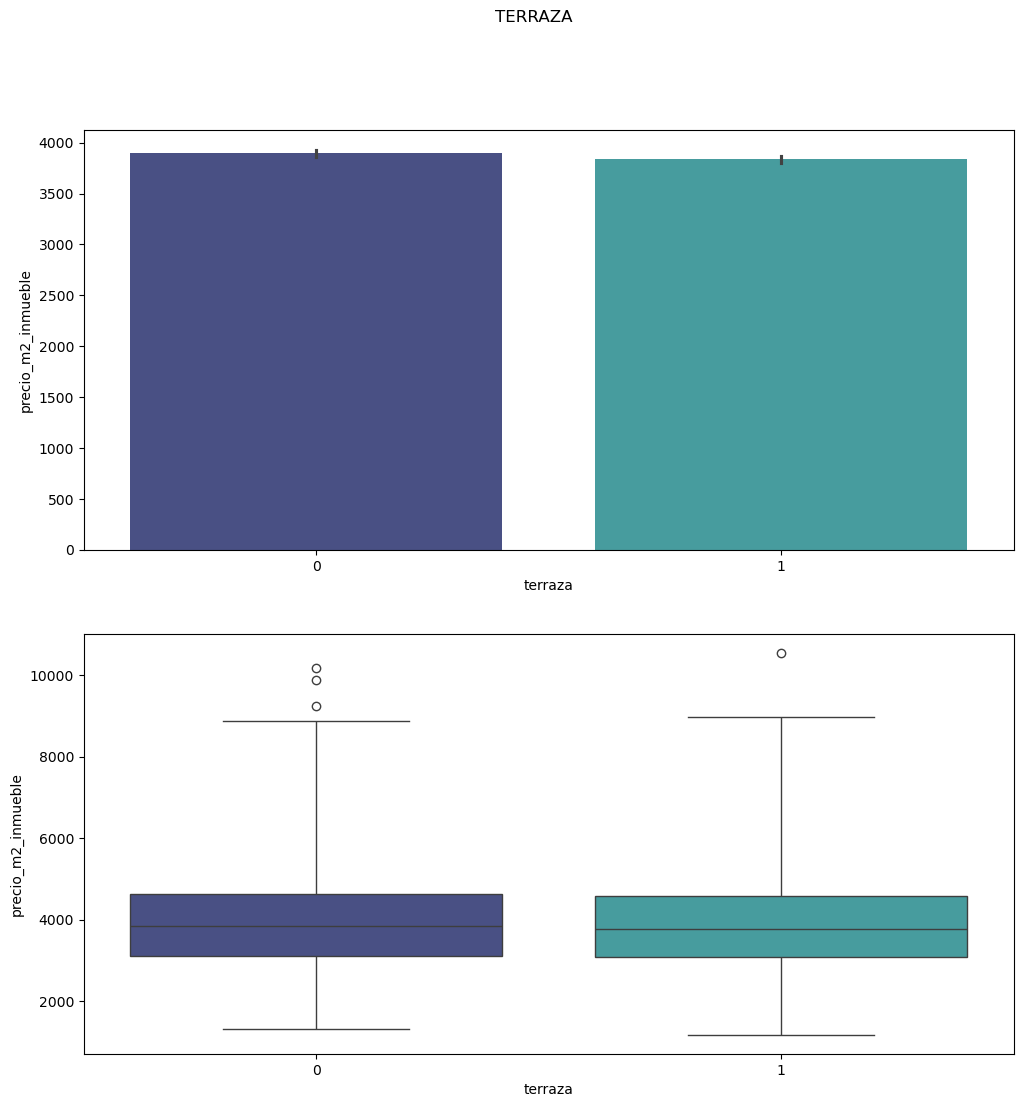

,precio_m2_inmueble
piscina,
1,3835.602161
0,3880.295243


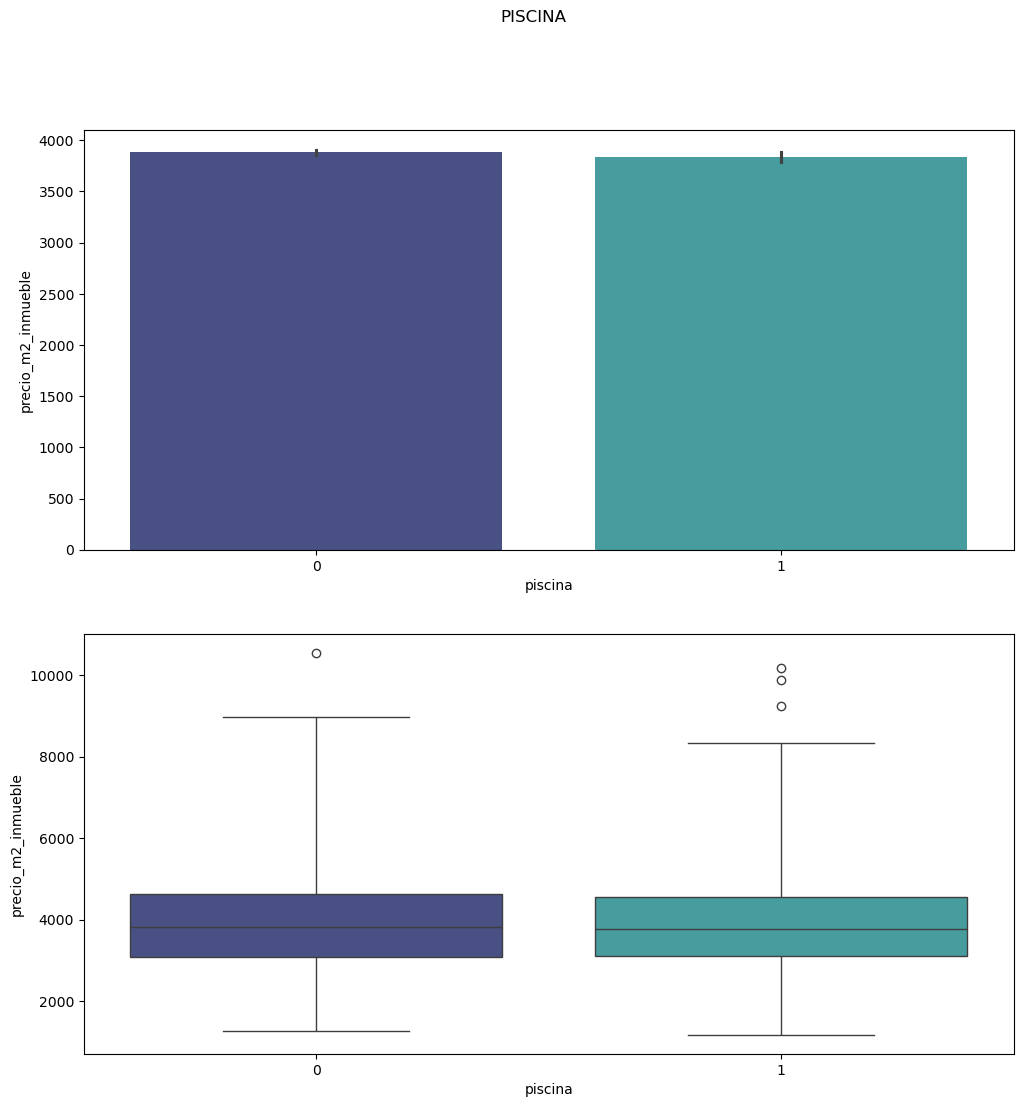

,precio_m2_inmueble
garaje,
1,3867.566815
0,3876.872711


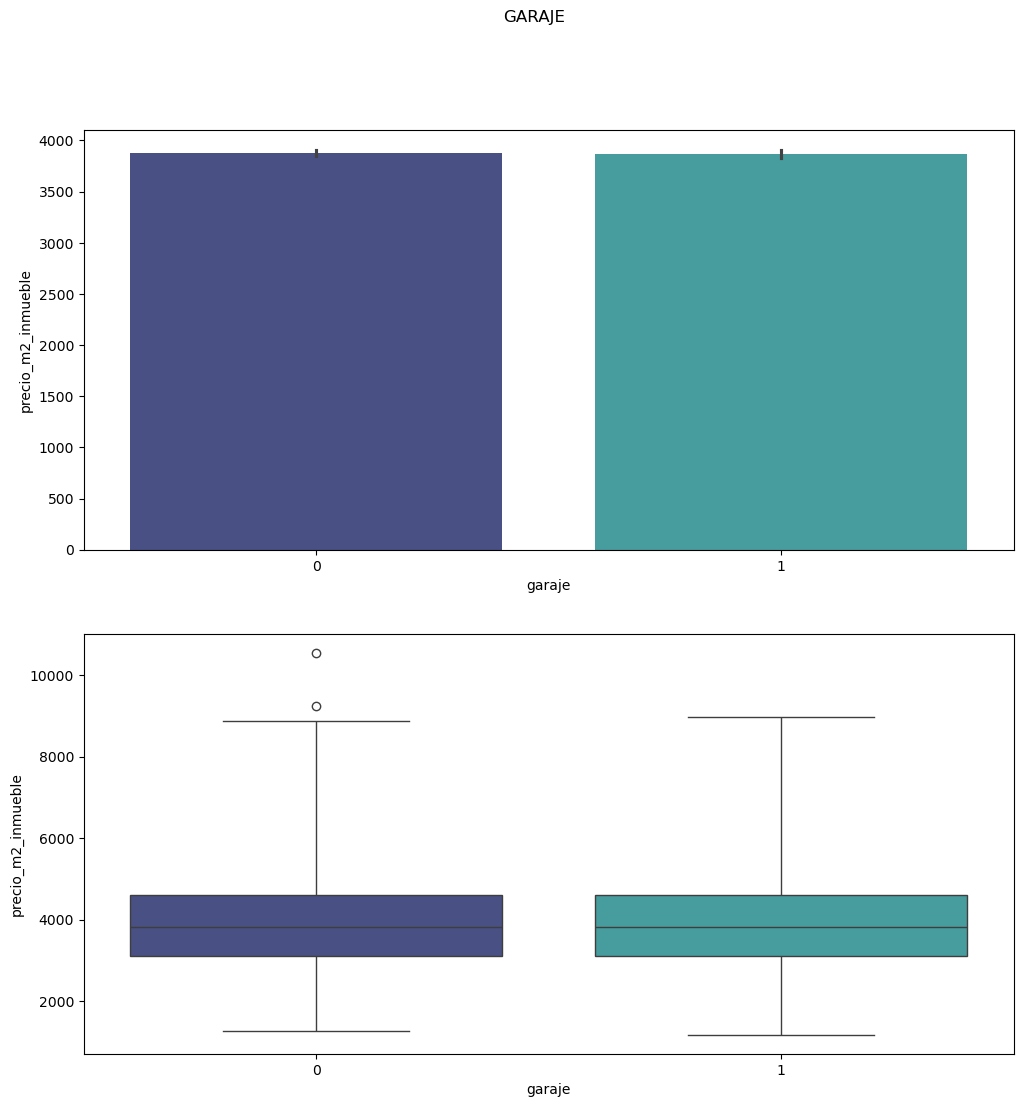

,precio_m2_inmueble
trastero,
0,3873.771937
1,3879.186377


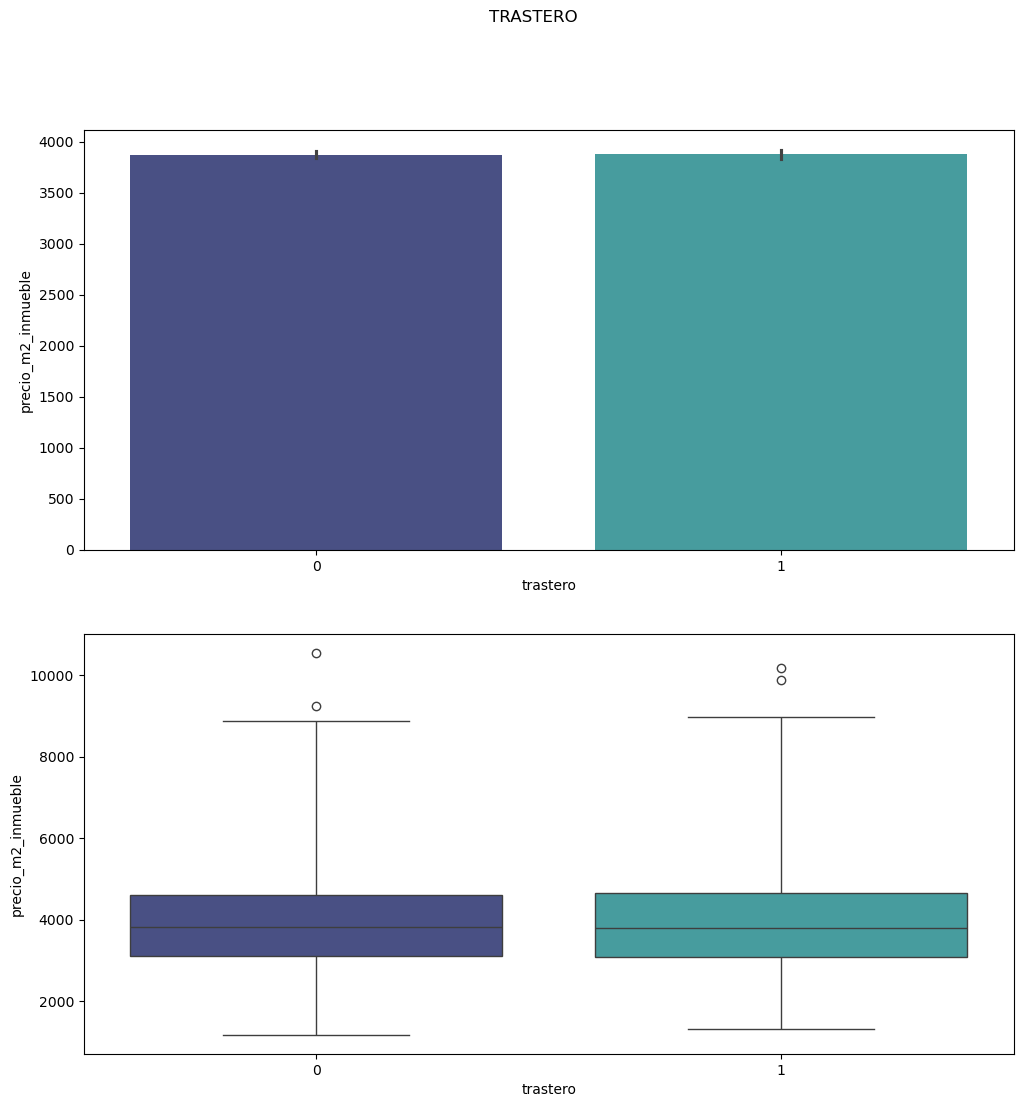

In [202]:
# Representación de cada variable con el precio

variables = ['tipo_inmueble','estado', 'planta', 'ascensor', 'terraza', 'piscina', 'garaje', 'trastero']
for var in variables:  
    display(df_prueba.groupby(var).agg({'precio_m2_inmueble':'mean'}).sort_values(by='precio_m2_inmueble'))

    fig, ax = plt.subplots(2,1,figsize=(12,12))

    sns.barplot(
        data=df_prueba,
        x=var,
        y='precio_m2_inmueble',
        hue=var,
        palette='mako',
        legend=False,
        ax=ax[0]
    )
    
    sns.boxplot(
        data=df_prueba,
        x=var,
        y='precio_m2_inmueble',
        hue=var,
        palette='mako',
        whis=3,
        legend=False,
        ax=ax[1]
    )
    plt.suptitle(f"{var.upper()}")
    plt.show()

Observaciones:
Ningún valor de las variables de propiedad parece tener un efecto directo en el precio por m2

## Análisis temporal

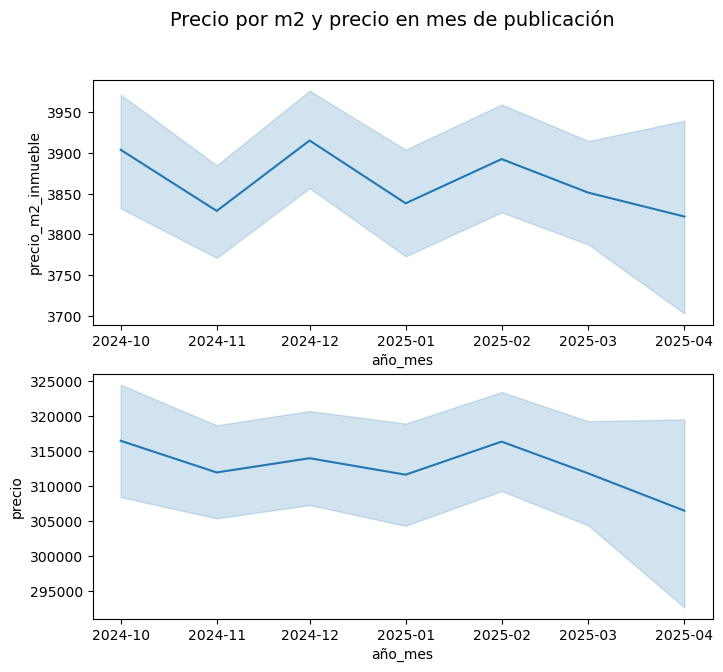

In [203]:
# Precio m2 por mes

#Se crea columnas para 
df_prueba['año_mes'] = df_prueba['fecha_publicacion'].dt.strftime('%Y-%m')
df_prueba['año_mes'] = pd.to_datetime(df_prueba['año_mes'])
df_prueba['mes_publicacion'] = df_prueba['fecha_publicacion'].dt.month

fig, ax = plt.subplots(2,1,figsize=(8,7))


sns.lineplot(
    data=df_prueba,
    y='precio_m2_inmueble',
    x='año_mes',
    ax=ax[0]
)

sns.lineplot(
    data=df_prueba,
    y='precio',
    x='año_mes',
    ax=ax[1]
)

# plt.xticks(rotation=45) #ticks=range(13)
plt.suptitle("Precio por m2 y precio en mes de publicación", fontsize=14)
plt.show()

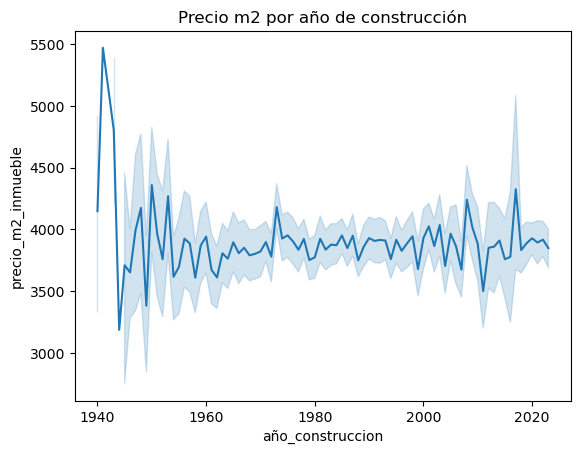

In [204]:
# Año de construcción

plt.figsize=(15,7)

sns.lineplot(
    data=df_prueba,
    y='precio_m2_inmueble',
    x='año_construccion'
)
plt.title("Precio m2 por año de construcción")
plt.show()

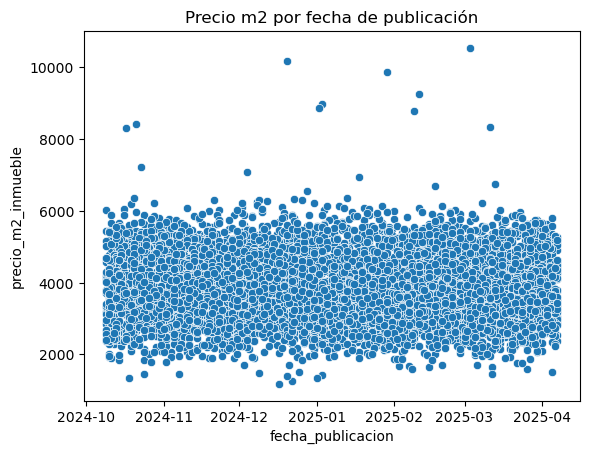

In [205]:
# Fecha de publicación

plt.figsize=(10,7)

sns.scatterplot(
    data=df_prueba,
    y='precio_m2_inmueble',
    x='fecha_publicacion'
)
plt.title("Precio m2 por fecha de publicación")
plt.show()

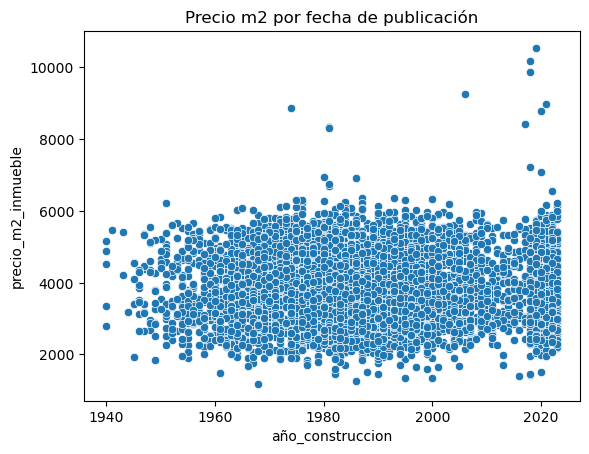

In [206]:
# Año de construcción

plt.figsize=(10,7)

sns.scatterplot(
    data=df_prueba,
    y='precio_m2_inmueble',
    x='año_construccion'
)
plt.title("Precio m2 por fecha de publicación")
plt.show()

Observaciones:  
* Los precios mas bajos en inmuebles se encuentran en publicaciones de Enero, Abril y Noviembre
* El año de construcción no da información concluyente.  
* Es posible que en el mes de Noviembre se hayan vendido casas de gran superficie por un bajo precio.

# Potenciales oportunidades según observaciones  


### Teniendo en cuenta los siguientes patrones 

* Inmuebles cuyo precio por m2 está entre el 25% más barato de los datos.
* Zonas de bajo nivel adquisitivo con pocos colegios, bien conectadas por el transporte y buena accesibilidad pero alta contaminación.
* Meses de publicaciones de bajos precios.  
* Casas mas grandes en superficie que la media pues hay meses donde hay mejores precios en casa de gran superficie

In [207]:
condicion_baratas = df_prueba['precio_m2_inmueble'] < df_prueba['precio_m2_inmueble'].quantile(0.25)
condicion_renta_baja = df_prueba['renta_media'] < df_prueba['renta_media'].mean()
condicion_colegios = df_prueba['num_colegios'] < df_prueba['num_colegios'].mean()
condicion_transporte = df_prueba['num_estaciones_transp'] > df_prueba['num_estaciones_transp'].mean()
condicion_accesibilidad = df_prueba['indice_accesibilidad'] > df_prueba['indice_accesibilidad'].mean()
condicion_contaminacion = df_prueba['indice_contaminacion'] > df_prueba['indice_contaminacion'].mean()
condicion_mes = df_prueba['mes_publicacion'].isin([1,4,11])
# condicion_superficie = df_prueba['superficie_m2'] > df_prueba['superficie_m2'].mean()
# condicion_barrio = df_prueba['barrio'].isin(oportunidades_barrio['barrio'].unique().tolist())
# condicion_zona = df_prueba['barrio'].isin(oportunidades_inmueble['barrio'])

condicion =   (condicion_renta_baja) & (condicion_colegios) & (condicion_transporte)  & (condicion_contaminacion) & (condicion_accesibilidad) & (condicion_mes) 
# & (condicion_superficie)  (condicion_baratas) & 
print(f"Cantidad de inmuebles que cumplen con las condiciones: {len(df_prueba[condicion])}")
df_prueba[condicion].sort_values(by='precio_m2_inmueble')

Cantidad de inmuebles que cumplen con las condiciones: 75


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2,año_mes,mes_publicacion
6122,2448.414239,6123,málaga,la malagueta,Alquiler,piso,226968.0,92.7,2,1,...,5,0,medio,6.6,7.4,10.0,"Apartamento en edificio, usualmente con varias...",1452.261307,2024-11-01,11.0
5610,2483.788660,5611,málaga,la malagueta,Alquiler,dúplex,192742.0,77.6,1,1,...,5,0,medio,6.6,7.4,10.0,Apartamento de dos niveles comunicados mediant...,1452.261307,2024-11-01,11.0
5559,2621.516517,5560,málaga,la malagueta,Alquiler,estudio,174593.0,66.6,1,1,...,5,0,medio,6.6,7.4,10.0,"Vivienda de planta única, generalmente compacta.",1452.261307,2025-01-01,1.0
5748,2656.027397,5749,málaga,la malagueta,Venta,piso,252057.0,94.9,4,2,...,5,0,medio,6.6,7.4,10.0,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-01-01,1.0
5584,2703.798220,5585,málaga,la malagueta,Venta,piso,182236.0,67.4,3,1,...,5,0,medio,6.6,7.4,10.0,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,6064,málaga,la malagueta,Venta,piso,NaN,98.6,4,1,...,5,0,medio,6.6,7.4,10.0,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-01-01,1.0
6077,NaN,6078,málaga,la malagueta,Venta,dúplex,NaN,74.4,2,1,...,5,0,medio,6.6,7.4,10.0,Apartamento de dos niveles comunicados mediant...,1452.261307,2024-11-01,11.0
6095,NaN,6096,málaga,la malagueta,Venta,piso,NaN,49.9,2,1,...,5,0,medio,6.6,7.4,10.0,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-04-01,4.0
6097,NaN,6098,málaga,la malagueta,Venta,estudio,NaN,131.5,1,1,...,5,0,medio,6.6,7.4,10.0,"Vivienda de planta única, generalmente compacta.",1452.261307,2025-04-01,4.0


In [208]:
df_prueba[condicion]['precio_m2_inmueble'].mean()

3470.0382444837887

In [209]:
df_prueba[condicion][['ciudad','barrio']].value_counts()

ciudad  barrio      
málaga  la malagueta    75
Name: count, dtype: int64

El barrio de La malagueta en la ciudad de Málaga es la localización donde se contempla uno de los patrones.

### Se tiene en cuenta:  
* Zonas con gran cantidad de zonas verdes en el barrio, alto nivel de contaminación y bajo indice de accesibilidad
* Se incluyen aquellos inmuebles publicados en los meses de Noviembre, Enero y Abril donde se publicaban a menores precios por m2.

In [210]:
condicion_colegios = df_prueba['num_colegios'] > df_prueba['num_colegios'].mean()
condicion_accesibilidad = df_prueba['indice_accesibilidad'] > df_prueba['indice_accesibilidad'].mean()
condicion_contaminacion = df_prueba['indice_contaminacion'] < df_prueba['indice_contaminacion'].mean()
condicion_mes = df_prueba['mes_publicacion'].isin([1,4,11])

condicion = (condicion_colegios) & (condicion_accesibilidad) & (condicion_contaminacion) & (condicion_mes)
# 

print(f"Cantidad de inmuebles que cumplen con la condición: {len(df_prueba[condicion])}")
df_prueba[condicion].sample(3)

Cantidad de inmuebles que cumplen con la condición: 207


,precio_m2_inmueble,id_propiedad,ciudad,barrio,tipo_operacion,tipo_inmueble,precio,superficie_m2,habitaciones,baños,...,num_estaciones_transp,num_zonas_verdes,nivel_servicios,indice_seguridad,indice_contaminacion,indice_accesibilidad,descripcion,poblacion_km2,año_mes,mes_publicacion
334,5267.532014,335,madrid,tetuán,Alquiler,ático,452481.0,85.9,1,1,...,6,0,alto,8.0,4.9,8.6,"Piso en la última planta, con vistas y terraza.",5460.863809,2025-04-01,4.0
6049,2949.315217,6050,málaga,el palo,Venta,piso,271337.0,92.0,2,1,...,4,1,alto,3.4,5.3,7.7,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-04-01,4.0
5721,3398.689759,5722,málaga,el palo,Venta,piso,225673.0,66.4,2,1,...,4,1,alto,3.4,5.3,7.7,"Apartamento en edificio, usualmente con varias...",1452.261307,2025-01-01,1.0


In [211]:
df_prueba[condicion]['precio_m2_inmueble'].mean().round(2)

4208.25

### Teniendo en cuenta inmuebles de gran superficie  
con precio m2 menor que el cuartil 25 de los datos así se recogen los más baratos

In [212]:
# Posibles inmuebles grandes con precios bajos

print(f"Superficie en m2 mínima para considerarse outlier {out_superficie['superficie_m2'].round(2).min()}\nCuantil 25 de los precios m2 de las casas grandes: {out_superficie['precio_m2_inmueble'].quantile(0.25).round(2)}€\nCuantil 25 de los precios m2 en todo el dataset: {df_prueba['precio_m2_inmueble'].mean().round(2)}€")


Superficie en m2 mínima para considerarse outlier 163.2
Cuantil 25 de los precios m2 de las casas grandes: 2854.08€
Cuantil 25 de los precios m2 en todo el dataset: 3870.77€


In [213]:
# Se filtran inmuebles de gran superficie cuyo precio m2 esta por debajo del cuantil 25

filtro = out_superficie['precio_m2_inmueble'] < out_superficie['precio_m2_inmueble'].quantile(0.25)
grandes_baratas = out_superficie[filtro]

print(f"Cantidad inmuebles grandes a bajos precios m2: {grandes_baratas.shape[0]}")
display(grandes_baratas[['ciudad','barrio','tipo_inmueble','superficie_m2','precio','precio_m2_inmueble','precio_m2_barrio','precio_m2_ciudad']].round(2).sort_values(by='precio_m2_inmueble'))

Cantidad inmuebles grandes a bajos precios m2: 7


,ciudad,barrio,tipo_inmueble,superficie_m2,precio,precio_m2_inmueble,precio_m2_barrio,precio_m2_ciudad
3629,valencia,campanar,piso,188.94,413192.0,2186.93,5726.0,3000
3504,valencia,benimaclet,piso,197.79,486818.0,2461.34,4562.0,3000
3224,valencia,el carmen,ático,168.92,422683.0,2502.33,6975.0,3000
6925,zaragoza,san josé,piso,198.35,498395.0,2512.71,4682.0,2800
3241,valencia,ruzafa,piso,172.20,445667.0,2588.14,6182.0,3000
3377,valencia,ensanche,estudio,185.28,486909.0,2627.91,6851.0,3000
2873,valencia,campanar,piso,165.55,460056.0,2779.01,5726.0,3000


### Teniendo en cuenta el análisis temporal 

In [214]:
filtro = df_prueba['fecha_publicacion'].dt.month.isin([11,1,4])
print("Cantidad de inmuebles publicados en Noviembre, Enero y Abril:",df_prueba[filtro].shape[0])
print("Media de precio por metro cuadrado:",df_prueba[filtro]['precio_m2_inmueble'].mean())

Cantidad de inmuebles publicados en Noviembre, Enero y Abril: 2550
Media de precio por metro cuadrado: 3832.3374118775696


# Exportación de los datos procesados

In [ ]:
# En colab
df.to_csv("/content/drive/MyDrive/Desafio_Inmobiliaria/data/processed/df_inmuebles_unido.csv", index=False)
# En local
# df.to_csv("../data/processed/df_inmuebles_unido.csv", index=False)